In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('FullRawChillerPlant_demo_usage.csv')
df = df.rename(columns={'Unnamed: 0.1': 'timestamp'})
df = df.drop(columns='Unnamed: 0')

# Display basic info
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (712196, 37)

Column names:
['timestamp', 'CP_Chiller1_ChilledWaterFlowrate', 'CP_Chiller1_ChilledWaterReturnTemp', 'CP_Chiller1_ChilledWaterSupplyTemp', 'CP_Chiller1_CondenserWaterFlowrate', 'CP_Chiller1_CondenserWaterReturnTemp', 'CP_Chiller1_CondenserWaterSupplyTemp', 'CP_Chiller1_CoolingTons', 'CP_Chiller1_Efficiency', 'CP_Chiller1_kW', 'CP_Chiller2_ChilledWaterFlowrate', 'CP_Chiller2_ChilledWaterReturnTemp', 'CP_Chiller2_ChilledWaterSupplyTemp', 'CP_Chiller2_CondenserWaterFlowrate', 'CP_Chiller2_CondenserWaterReturnTemp', 'CP_Chiller2_CondenserWaterSupplyTemp', 'CP_Chiller2_CoolingTons', 'CP_Chiller2_Efficiency', 'CP_Chiller2_kW', 'CP_Chiller3_ChilledWaterFlowrate', 'CP_Chiller3_ChilledWaterReturnTemp', 'CP_Chiller3_ChilledWaterSupplyTemp', 'CP_Chiller3_CondenserWaterFlowrate', 'CP_Chiller3_CondenserWaterReturnTemp', 'CP_Chiller3_CondenserWaterSupplyTemp', 'CP_Chiller3_CoolingTons', 'CP_Chiller3_Efficiency', 'CP_Chiller3_kW', 'CP_CoolingTower1_CondenserWaterSupplyTe

,timestamp,CP_Chiller1_ChilledWaterFlowrate,CP_Chiller1_ChilledWaterReturnTemp,CP_Chiller1_ChilledWaterSupplyTemp,CP_Chiller1_CondenserWaterFlowrate,CP_Chiller1_CondenserWaterReturnTemp,CP_Chiller1_CondenserWaterSupplyTemp,CP_Chiller1_CoolingTons,CP_Chiller1_Efficiency,CP_Chiller1_kW,...,CP_Chiller3_kW,CP_CoolingTower1_CondenserWaterSupplyTemp,CP_CoolingTower2_CondenserWaterSupplyTemp,CP_CoolingTower3_CondenserWaterSupplyTemp,CP_CoolingTower4_CondenserWaterSupplyTemp,CP_CoolingTower5_CondenserWaterSupplyTemp,CP_CoolingTower6_CondenserWaterSupplyTemp,CP_CoolingTower7_CondenserWaterSupplyTemp,CP_CoolingTower8_CondenserWaterSupplyTemp,CP_CoolingTower9_CondenserWaterSupplyTemp
0,2011-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-06-01 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-06-01 00:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-06-01 00:09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-06-01 00:12:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Add CP_TotalChilledWaterPump_kW from system file to demo usage

We have two files:
- **FullRawChillerPlant_demo_usage.csv**: component-level data (chillers, cooling towers)
- **FullRawChillerPlantSystem.csv**: system-level and weather data

We'll add only the `CP_TotalChilledWaterPump_kW` column from the system file using a left join (keeping all rows from usage dataset), then clean up the combined dataset.

In [2]:
# Load both CSV files with consistent timestamp handling
df_usage = pd.read_csv('FullRawChillerPlant_demo_usage.csv')
df_system = pd.read_csv('FullRawChillerPlantSystem.csv')

# Clean usage: use first column as timestamp, drop index columns
df_usage = df_usage.rename(columns={df_usage.columns[0]: 'timestamp'})
if 'Unnamed: 0' in df_usage.columns:
    df_usage = df_usage.drop(columns=['Unnamed: 0'], errors='ignore')
if 'Unnamed: 0.1' in df_usage.columns:
    df_usage = df_usage.drop(columns=['Unnamed: 0.1'], errors='ignore')

# Clean system: first column is timestamp
df_system = df_system.rename(columns={df_system.columns[0]: 'timestamp'})
if 'Unnamed: 0' in df_system.columns:
    df_system = df_system.drop(columns=['Unnamed: 0'], errors='ignore')

# Parse timestamps as datetime
df_usage['timestamp'] = pd.to_datetime(df_usage['timestamp'])
df_system['timestamp'] = pd.to_datetime(df_system['timestamp'])


In [3]:
# Check timestamp overlap: are they the same system?
ts_usage = set(df_usage['timestamp'])
ts_system = set(df_system['timestamp'])
overlap = ts_usage & ts_system
only_usage = ts_usage - ts_system
only_system = ts_system - ts_usage

In [4]:
# Combine: add only CP_TotalChilledWaterPump_kW from system file using left join
# Left join keeps all rows from usage dataset and adds the column where timestamps match
df_system_subset = df_system[['timestamp', 'CP_TotalChilledWaterPump_kW']]

df_combined = df_usage.merge(
    df_system_subset,
    on='timestamp',
    how='left',  # Keep all rows from usage, add CP_TotalChilledWaterPump_kW where available
    suffixes=('', '_sys')
)

# Fill missing values in CP_TotalChilledWaterPump_kW with 0 (pump was turned off)
missing_before = df_combined['CP_TotalChilledWaterPump_kW'].isna().sum()
df_combined['CP_TotalChilledWaterPump_kW'] = df_combined['CP_TotalChilledWaterPump_kW'].fillna(0)

# Sort by timestamp for easier inspection
df_combined = df_combined.sort_values('timestamp').reset_index(drop=True)

print("=== Combined dataset (left join on timestamp) ===")
print("Shape:", df_combined.shape)
print("Columns:", len(df_combined.columns))
print("\nTimestamp range:")
print(df_combined['timestamp'].min(), "→", df_combined['timestamp'].max())
print(f"\nFilled {missing_before} missing values in CP_TotalChilledWaterPump_kW with 0 (pump was OFF)")
print(f"Missing values remaining: {df_combined['CP_TotalChilledWaterPump_kW'].isna().sum()}")
print("\nFirst few rows:")
df_combined.head(10)

=== Combined dataset (left join on timestamp) ===
Shape: (712199, 38)
Columns: 38

Timestamp range:
2011-06-01 00:00:00 → 2014-04-09 20:48:00

Filled 268940 missing values in CP_TotalChilledWaterPump_kW with 0 (pump was OFF)
Missing values remaining: 0

First few rows:


,timestamp,CP_Chiller1_ChilledWaterFlowrate,CP_Chiller1_ChilledWaterReturnTemp,CP_Chiller1_ChilledWaterSupplyTemp,CP_Chiller1_CondenserWaterFlowrate,CP_Chiller1_CondenserWaterReturnTemp,CP_Chiller1_CondenserWaterSupplyTemp,CP_Chiller1_CoolingTons,CP_Chiller1_Efficiency,CP_Chiller1_kW,...,CP_CoolingTower1_CondenserWaterSupplyTemp,CP_CoolingTower2_CondenserWaterSupplyTemp,CP_CoolingTower3_CondenserWaterSupplyTemp,CP_CoolingTower4_CondenserWaterSupplyTemp,CP_CoolingTower5_CondenserWaterSupplyTemp,CP_CoolingTower6_CondenserWaterSupplyTemp,CP_CoolingTower7_CondenserWaterSupplyTemp,CP_CoolingTower8_CondenserWaterSupplyTemp,CP_CoolingTower9_CondenserWaterSupplyTemp,CP_TotalChilledWaterPump_kW
0,2011-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-06-01 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-06-01 00:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-06-01 00:09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-06-01 00:12:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2011-06-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2011-06-01 00:18:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2011-06-01 00:21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2011-06-01 00:24:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2011-06-01 00:27:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Timestamp Regularization: Ensure 3-minute intervals

We need to ensure:
1. Every timestamp is exactly 3 minutes apart
2. If timestamps are missing, create them with 0 values
3. If timestamps exist at intervals < 3 minutes, aggregate them to 3-minute intervals

In [5]:
# Timestamp Regularization: Ensure 3-minute intervals
print("=" * 60)
print("TIMESTAMP REGULARIZATION")
print("=" * 60)

# Set timestamp as index for resampling
df_combined_indexed = df_combined.set_index('timestamp').sort_index()

print(f"\nBefore regularization:")
print(f"  Total rows: {len(df_combined_indexed)}")
print(f"  Timestamp range: {df_combined_indexed.index.min()} → {df_combined_indexed.index.max()}")
print(f"  Expected 3-min intervals: {(df_combined_indexed.index.max() - df_combined_indexed.index.min()).total_seconds() / 180:.0f}")
print(f"  Actual intervals: {len(df_combined_indexed)}")

# Check current interval distribution
time_diffs = df_combined_indexed.index.to_series().diff().dropna()
print(f"\n  Current interval distribution:")
interval_counts = time_diffs.value_counts().head(10)
for interval, count in interval_counts.items():
    print(f"    {interval}: {count} occurrences")

# Resample to 3-minute intervals
# For values that need aggregation (intervals < 3 min), use mean
# For missing intervals, fill with 0
print(f"\n✓ Resampling to 3-minute intervals...")

# Get numeric columns (for aggregation) and non-numeric columns
numeric_cols = df_combined_indexed.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df_combined_indexed.select_dtypes(exclude=[np.number]).columns.tolist()

# Create complete 3-minute interval range
start_time = df_combined_indexed.index.min()
end_time = df_combined_indexed.index.max()
complete_range = pd.date_range(start=start_time, end=end_time, freq='3min')

print(f"  Complete range: {len(complete_range)} timestamps")
print(f"  Original timestamps: {len(df_combined_indexed)}")

# Resample numeric columns: aggregate sub-3-minute intervals using mean
df_resampled = df_combined_indexed[numeric_cols].resample('3min').mean()

# Reindex to complete range and fill missing values with 0
df_resampled = df_resampled.reindex(complete_range, fill_value=0)

# Handle non-numeric columns if any (forward fill, then fill remaining with first value)
if len(non_numeric_cols) > 0:
    df_non_numeric = df_combined_indexed[non_numeric_cols].resample('3min').first()
    df_non_numeric = df_non_numeric.reindex(complete_range, method='ffill')
    df_non_numeric = df_non_numeric.fillna(method='bfill')  # Fill any remaining NaNs
    df_resampled = pd.concat([df_resampled, df_non_numeric], axis=1)

# Reset index to make timestamp a column again
df_combined = df_resampled.reset_index()
df_combined = df_combined.rename(columns={'index': 'timestamp'})

print(f"\nAfter regularization:")
print(f"  Total rows: {len(df_combined)}")
print(f"  Timestamp range: {df_combined['timestamp'].min()} → {df_combined['timestamp'].max()}")
print(f"  Missing timestamps filled: {len(complete_range) - len(df_combined_indexed)}")

# Verify 3-minute intervals
time_diffs_new = df_combined['timestamp'].diff().dropna()
expected_interval = pd.Timedelta(minutes=3)
non_standard_intervals = time_diffs_new[time_diffs_new != expected_interval]
if len(non_standard_intervals) == 0:
    print(f"  ✓ All intervals are exactly 3 minutes")
else:
    print(f"  ⚠ WARNING: {len(non_standard_intervals)} intervals are not 3 minutes")
    print(f"    Non-standard intervals: {non_standard_intervals.value_counts().head()}")

print(f"\n✓ Timestamp regularization complete!")
print(f"\nFirst few rows:")
df_combined.head(10)

TIMESTAMP REGULARIZATION

Before regularization:
  Total rows: 712199
  Timestamp range: 2011-06-01 00:00:00 → 2014-04-09 20:48:00
  Expected 3-min intervals: 501056
  Actual intervals: 712199

  Current interval distribution:
    0 days 00:03:00: 352536 occurrences
    0 days 00:01:00: 151367 occurrences
    0 days 00:01:01: 24085 occurrences
    0 days 00:00:59: 6696 occurrences
    0 days 00:00:39: 3845 occurrences
    0 days 00:00:21: 3828 occurrences
    0 days 00:00:28: 3804 occurrences
    0 days 00:00:20: 3795 occurrences
    0 days 00:00:32: 3786 occurrences
    0 days 00:00:40: 3745 occurrences

✓ Resampling to 3-minute intervals...
  Complete range: 501057 timestamps
  Original timestamps: 712199

After regularization:
  Total rows: 501057
  Timestamp range: 2011-06-01 00:00:00 → 2014-04-09 20:48:00
  Missing timestamps filled: -211142
  ✓ All intervals are exactly 3 minutes

✓ Timestamp regularization complete!

First few rows:


,timestamp,CP_Chiller1_ChilledWaterFlowrate,CP_Chiller1_ChilledWaterReturnTemp,CP_Chiller1_ChilledWaterSupplyTemp,CP_Chiller1_CondenserWaterFlowrate,CP_Chiller1_CondenserWaterReturnTemp,CP_Chiller1_CondenserWaterSupplyTemp,CP_Chiller1_CoolingTons,CP_Chiller1_Efficiency,CP_Chiller1_kW,...,CP_CoolingTower1_CondenserWaterSupplyTemp,CP_CoolingTower2_CondenserWaterSupplyTemp,CP_CoolingTower3_CondenserWaterSupplyTemp,CP_CoolingTower4_CondenserWaterSupplyTemp,CP_CoolingTower5_CondenserWaterSupplyTemp,CP_CoolingTower6_CondenserWaterSupplyTemp,CP_CoolingTower7_CondenserWaterSupplyTemp,CP_CoolingTower8_CondenserWaterSupplyTemp,CP_CoolingTower9_CondenserWaterSupplyTemp,CP_TotalChilledWaterPump_kW
0,2011-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-06-01 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-06-01 00:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-06-01 00:09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-06-01 00:12:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2011-06-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2011-06-01 00:18:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2011-06-01 00:21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2011-06-01 00:24:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2011-06-01 00:27:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Check for Missing or Meaningless Values

Identify rows where values are zero, empty, or stay unchanged for long periods, and determine if this means:
- **System was OFF**: All or most values are zero (equipment not running)
- **Sensor stopped reporting**: Some sensors have zeros while others have values
- **Data is invalid**: Unrealistic values or patterns

In [6]:
# Helper function to convert decimal hours to HH:MM:SS format
def hours_to_hms(hours):
    """Convert decimal hours to hour:minute:second format"""
    total_seconds = int(hours * 3600)
    h = total_seconds // 3600
    m = (total_seconds % 3600) // 60
    s = total_seconds % 60
    return f"{h}:{m:02d}:{s:02d}"

# Check for Missing or Meaningless Values
print("=" * 60)
print("MISSING AND MEANINGLESS VALUES ANALYSIS")
print("=" * 60)

# Get numeric columns (exclude timestamp)
numeric_cols = df_combined.select_dtypes(include=[np.number]).columns.tolist()

# 1. Check for NaN/null values
print("\n1. MISSING VALUES (NaN/null)")
print("-" * 60)
missing_counts = df_combined[numeric_cols].isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
if len(missing_counts) > 0:
    print(f"  ⚠ Columns with missing values:")
    for col, count in missing_counts.head(10).items():
        pct = (count / len(df_combined)) * 100
        print(f"    {col}: {count} ({pct:.2f}%)")
    print(f"\n  Total missing values: {missing_counts.sum()}")
else:
    print("  ✓ No missing values found!")

# 2. Identify system OFF periods (all or most values are zero)
print("\n2. SYSTEM OFF DETECTION")
print("-" * 60)

# Get power columns to determine system status
power_cols = [col for col in numeric_cols if 'kW' in col]
flowrate_cols = [col for col in numeric_cols if 'Flowrate' in col]
key_operational_cols = power_cols + flowrate_cols

if len(key_operational_cols) > 0:
    # System is OFF if all power and flowrate values are zero
    df_combined['system_off'] = (df_combined[key_operational_cols] == 0).all(axis=1)
    system_off_count = df_combined['system_off'].sum()
    system_off_pct = (system_off_count / len(df_combined)) * 100
    
    print(f"  Key operational columns used: {len(key_operational_cols)}")
    print(f"    Power columns: {len(power_cols)}")
    print(f"    Flowrate columns: {len(flowrate_cols)}")
    print(f"\n  System OFF periods:")
    print(f"    Total rows with system OFF: {system_off_count} ({system_off_pct:.2f}%)")
    print(f"    System ON periods: {len(df_combined) - system_off_count} ({100-system_off_pct:.2f}%)")
    
    # Find continuous OFF periods
    df_combined['off_period_id'] = (df_combined['system_off'] != df_combined['system_off'].shift()).cumsum()
    off_periods = df_combined[df_combined['system_off']].groupby('off_period_id').agg({
        'timestamp': ['min', 'max', 'count']
    })
    off_periods.columns = ['start_time', 'end_time', 'duration_minutes']
    off_periods['duration_hours'] = (off_periods['duration_minutes'] * 3) / 60  # 3-minute intervals
    
    print(f"\n  Continuous OFF periods: {len(off_periods)}")
    if len(off_periods) > 0:
        min_duration = hours_to_hms(off_periods['duration_hours'].min())
        max_duration = hours_to_hms(off_periods['duration_hours'].max())
        avg_duration = hours_to_hms(off_periods['duration_hours'].mean())
        print(f"    Shortest OFF period: {min_duration}")
        print(f"    Longest OFF period: {max_duration}")
        print(f"    Average OFF period: {avg_duration}")
        print(f"\n  Top 5 longest OFF periods:")
        for idx, row in off_periods.nlargest(5, 'duration_hours').iterrows():
            duration_str = hours_to_hms(row['duration_hours'])
            print(f"    {row['start_time']} → {row['end_time']}: {duration_str}")
else:
    print("  ⚠ No power or flowrate columns found - cannot determine system status")

# 3. Check for zero values per column
print("\n3. ZERO VALUES BY COLUMN")
print("-" * 60)
zero_counts = (df_combined[numeric_cols] == 0).sum()
zero_counts = zero_counts[zero_counts > 0].sort_values(ascending=False)

if len(zero_counts) > 0:
    print(f"  Columns with zero values (top 15):")
    for col, count in zero_counts.head(15).items():
        pct = (count / len(df_combined)) * 100
        print(f"    {col}: {count} ({pct:.2f}%)")
    print(f"\n  Total zero values across all columns: {zero_counts.sum()}")
else:
    print("  ✓ No zero values found!")

# 4. Check for unchanged/stuck sensor values (sensor failure indicator)
print("\n4. STUCK SENSOR DETECTION")
print("-" * 60)
print("  Checking for sensors that don't change for extended periods (≥1 hour)...")

stuck_sensors = []
for col in numeric_cols[:20]:  # Check first 20 columns to avoid too much output
    col_data = df_combined[col]
    # Find sequences where value doesn't change for at least 1 hour (20 consecutive 3-min intervals)
    # Exclude zeros (already identified as system OFF)
    non_zero_mask = col_data != 0
    if non_zero_mask.sum() > 0:
        # Check for unchanged values in non-zero data
        unchanged = (col_data == col_data.shift(1)) & non_zero_mask
        if unchanged.sum() > 0:
            # Count consecutive unchanged periods
            groups = (unchanged != unchanged.shift()).cumsum()
            consecutive_counts = groups[unchanged].value_counts()
            long_stuck = consecutive_counts[consecutive_counts >= 20].sum() if len(consecutive_counts) > 0 else 0
            
            if long_stuck > 0:
                stuck_sensors.append({
                    'column': col,
                    'stuck_periods': long_stuck,
                    'max_consecutive': consecutive_counts.max() if len(consecutive_counts) > 0 else 0
                })

if stuck_sensors:
    print(f"  ⚠ Found {len(stuck_sensors)} sensors with stuck values (≥1 hour unchanged, non-zero):")
    for sensor in stuck_sensors[:10]:  # Show top 10
        hours_stuck = (sensor['max_consecutive'] * 3) / 60
        duration_str = hours_to_hms(hours_stuck)
        print(f"    {sensor['column']}: {sensor['stuck_periods']} periods, max {duration_str}")
else:
    print("  ✓ No stuck sensors detected (all sensors show variation when system is ON)")

# 5. Partial system operation (some sensors zero, others active)
print("\n5. PARTIAL SYSTEM OPERATION")
print("-" * 60)
if len(power_cols) > 0:
    # Check if some power is zero while others are non-zero
    power_sum = df_combined[power_cols].sum(axis=1)
    some_power_zero = ((df_combined[power_cols] == 0).any(axis=1) & 
                       (df_combined[power_cols] != 0).any(axis=1))
    
    partial_operation_count = some_power_zero.sum()
    print(f"  Rows with partial operation (some equipment ON, some OFF): {partial_operation_count}")
    print(f"    Percentage: {(partial_operation_count/len(df_combined)*100):.2f}%")
    
    if partial_operation_count > 0:
        print(f"    This indicates normal operation where not all equipment runs simultaneously")

# Summary
print(f"\n{'=' * 60}")
print("SUMMARY")
print(f"{'=' * 60}")
print(f"  Total rows: {len(df_combined)}")
print(f"  Columns with missing values: {len(missing_counts)}")
print(f"  System OFF periods: {system_off_count if 'system_off' in df_combined.columns else 'N/A'} ({system_off_pct if 'system_off' in df_combined.columns else 0:.2f}%)")
print(f"  Stuck sensors detected: {len(stuck_sensors)}")
print(f"{'=' * 60}")

# Display sample of system OFF periods
if 'system_off' in df_combined.columns and system_off_count > 0:
    print("\nSample of system OFF periods:")
    print(df_combined[df_combined['system_off']][['timestamp'] + key_operational_cols[:5]].head(10))

MISSING AND MEANINGLESS VALUES ANALYSIS

1. MISSING VALUES (NaN/null)
------------------------------------------------------------
  ⚠ Columns with missing values:
    CP_Chiller2_CoolingTons: 313097 (62.49%)
    CP_CoolingTower9_CondenserWaterSupplyTemp: 57935 (11.56%)
    CP_Chiller2_Efficiency: 57934 (11.56%)
    CP_CoolingTower3_CondenserWaterSupplyTemp: 57932 (11.56%)
    CP_Chiller1_Efficiency: 57932 (11.56%)
    CP_Chiller2_ChilledWaterFlowrate: 57807 (11.54%)
    CP_CoolingTower1_CondenserWaterSupplyTemp: 57807 (11.54%)
    CP_Chiller2_ChilledWaterSupplyTemp: 57807 (11.54%)
    CP_CoolingTower6_CondenserWaterSupplyTemp: 57807 (11.54%)
    CP_CoolingTower7_CondenserWaterSupplyTemp: 57807 (11.54%)

  Total missing values: 2394429

2. SYSTEM OFF DETECTION
------------------------------------------------------------
  Key operational columns used: 10
    Power columns: 4
    Flowrate columns: 6

  System OFF periods:
    Total rows with system OFF: 23775 (4.74%)
    System ON perio

## Check Values Make Sense

Verify that temperatures, power, efficiencies, and humidity stay within reasonable limits:
- **Efficiencies**: Should be between 0 and 1 (or 0-100% if percentage)
- **Temperatures**: Should be within reasonable HVAC range (not extreme)
- **Power**: Should be non-negative and within reasonable upper limits
- **Humidity**: Should be between 0-100%

In [7]:
# Check Values Make Sense - Value Range Validation
print("=" * 60)
print("VALUE RANGE VALIDATION")
print("=" * 60)

# Get numeric columns (exclude timestamp)
numeric_cols = df_combined.select_dtypes(include=[np.number]).columns.tolist()

# 1. Efficiency columns (should be between 0 and 1, or 0-100%)
efficiency_cols = [col for col in numeric_cols if 'Efficiency' in col]
print(f"\n1. EFFICIENCY VALUES")
print("-" * 60)
print(f"  Checking {len(efficiency_cols)} efficiency columns...")

efficiency_issues = {}
for col in efficiency_cols:
    col_data = df_combined[col].dropna()
    if len(col_data) > 0:
        # Check for negative values
        negative = (col_data < 0).sum()
        # Check for values > 1 (assuming normalized 0-1 scale)
        over_one = (col_data > 1).sum()
        # Check for values > 100 (assuming percentage scale)
        over_hundred = (col_data > 100).sum()
        
        if negative > 0 or over_one > 0 or over_hundred > 0:
            efficiency_issues[col] = {
                'negative': negative,
                'over_one': over_one,
                'over_hundred': over_hundred,
                'min': col_data.min(),
                'max': col_data.max(),
                'mean': col_data.mean()
            }

if efficiency_issues:
    print(f"  ⚠ Found {len(efficiency_issues)} efficiency columns with values outside expected range:")
    for col, issues in efficiency_issues.items():
        print(f"\n    {col}:")
        print(f"      Range: [{issues['min']:.4f}, {issues['max']:.4f}]")
        print(f"      Mean: {issues['mean']:.4f}")
        if issues['negative'] > 0:
            print(f"      ⚠ Negative values: {issues['negative']} ({(issues['negative']/len(df_combined)*100):.2f}%)")
        if issues['over_one'] > 0:
            print(f"      ⚠ Values > 1: {issues['over_one']} ({(issues['over_one']/len(df_combined)*100):.2f}%)")
        if issues['over_hundred'] > 0:
            print(f"      ⚠ Values > 100: {issues['over_hundred']} ({(issues['over_hundred']/len(df_combined)*100):.2f}%)")
else:
    print("  ✓ All efficiency values within reasonable range (0-1 or 0-100)")

# 2. Temperature columns (should be reasonable for HVAC systems: -20°C to 50°C)
temp_cols = [col for col in numeric_cols if 'Temp' in col]
print(f"\n2. TEMPERATURE VALUES")
print("-" * 60)
print(f"  Checking {len(temp_cols)} temperature columns...")

temp_issues = {}
for col in temp_cols:
    col_data = df_combined[col].dropna()
    if len(col_data) > 0:
        # Reasonable range: -20°C to 50°C 
        too_cold = (col_data < -20).sum()
        too_hot = (col_data > 50).sum()
        
        if too_cold > 0 or too_hot > 0:
            temp_issues[col] = {
                'too_cold': too_cold,
                'too_hot': too_hot,
                'min': col_data.min(),
                'max': col_data.max(),
                'mean': col_data.mean()
            }

if temp_issues:
    print(f"  ⚠ Found {len(temp_issues)} temperature columns with values outside reasonable range (-20°C to 50°C):")
    for col, issues in temp_issues.items():
        print(f"\n    {col}:")
        print(f"      Range: [{issues['min']:.2f}°C, {issues['max']:.2f}°C]")
        print(f"      Mean: {issues['mean']:.2f}°C")
        if issues['too_cold'] > 0:
            print(f"      ⚠ Values < -20°C: {issues['too_cold']} ({(issues['too_cold']/len(df_combined)*100):.2f}%)")
        if issues['too_hot'] > 0:
            print(f"      ⚠ Values > 50°C: {issues['too_hot']} ({(issues['too_hot']/len(df_combined)*100):.2f}%)")
else:
    print("  ✓ All temperature values within reasonable range (-20°C to 50°C)")

# 3. Power columns (kW - should be non-negative, reasonable upper limit)
power_cols = [col for col in numeric_cols if 'kW' in col]
print(f"\n3. POWER VALUES (kW)")
print("-" * 60)
print(f"  Checking {len(power_cols)} power columns...")

power_issues = {}
for col in power_cols:
    col_data = df_combined[col].dropna()
    if len(col_data) > 0:
        # Power should be non-negative, reasonable upper limit: 0 to 700 kW
        negative = (col_data < 0).sum()
        too_high = (col_data > 700).sum()
        
        if negative > 0 or too_high > 0:
            power_issues[col] = {
                'negative': negative,
                'too_high': too_high,
                'min': col_data.min(),
                'max': col_data.max(),
                'mean': col_data.mean()
            }

if power_issues:
    print(f"  ⚠ Found {len(power_issues)} power columns with values outside reasonable range (0-700 kW):")
    for col, issues in power_issues.items():
        print(f"\n    {col}:")
        print(f"      Range: [{issues['min']:.2f} kW, {issues['max']:.2f} kW]")
        print(f"      Mean: {issues['mean']:.2f} kW")
        if issues['negative'] > 0:
            print(f"      ⚠ Negative values: {issues['negative']} ({(issues['negative']/len(df_combined)*100):.2f}%)")
        if issues['too_high'] > 0:
            print(f"      ⚠ Values > 700 kW: {issues['too_high']} ({(issues['too_high']/len(df_combined)*100):.2f}%)")
else:
    print("  ✓ All power values within reasonable range (0-700 kW)")

# 4. Humidity columns (should be 0-100%)
humidity_cols = [col for col in numeric_cols if 'Humidity' in col]
print(f"\n4. HUMIDITY VALUES (%)")
print("-" * 60)
print(f"  Checking {len(humidity_cols)} humidity columns...")

humidity_issues = {}
for col in humidity_cols:
    col_data = df_combined[col].dropna()
    if len(col_data) > 0:
        # Humidity should be 0-100%
        negative = (col_data < 0).sum()
        over_hundred = (col_data > 100).sum()
        
        if negative > 0 or over_hundred > 0:
            humidity_issues[col] = {
                'negative': negative,
                'over_hundred': over_hundred,
                'min': col_data.min(),
                'max': col_data.max(),
                'mean': col_data.mean()
            }

if humidity_issues:
    print(f"  ⚠ Found {len(humidity_issues)} humidity columns with values outside reasonable range (0-100%):")
    for col, issues in humidity_issues.items():
        print(f"\n    {col}:")
        print(f"      Range: [{issues['min']:.2f}%, {issues['max']:.2f}%]")
        print(f"      Mean: {issues['mean']:.2f}%")
        if issues['negative'] > 0:
            print(f"      ⚠ Negative values: {issues['negative']} ({(issues['negative']/len(df_combined)*100):.2f}%)")
        if issues['over_hundred'] > 0:
            print(f"      ⚠ Values > 100%: {issues['over_hundred']} ({(issues['over_hundred']/len(df_combined)*100):.2f}%)")
else:
    print("  ✓ All humidity values within reasonable range (0-100%)")

# 5. Flowrate columns (should be non-negative)
flowrate_cols = [col for col in numeric_cols if 'Flowrate' in col]
print(f"\n5. FLOWRATE VALUES")
print("-" * 60)
print(f"  Checking {len(flowrate_cols)} flowrate columns...")

flowrate_issues = {}
for col in flowrate_cols:
    col_data = df_combined[col].dropna()
    if len(col_data) > 0:
        negative = (col_data < 0).sum()
        if negative > 0:
            flowrate_issues[col] = {
                'negative': negative,
                'min': col_data.min(),
                'max': col_data.max(),
                'mean': col_data.mean()
            }

if flowrate_issues:
    print(f"  ⚠ Found {len(flowrate_issues)} flowrate columns with negative values:")
    for col, issues in flowrate_issues.items():
        print(f"\n    {col}:")
        print(f"      Range: [{issues['min']:.2f}, {issues['max']:.2f}]")
        print(f"      Mean: {issues['mean']:.2f}")
        print(f"      ⚠ Negative values: {issues['negative']} ({(issues['negative']/len(df_combined)*100):.2f}%)")
else:
    print("  ✓ All flowrate values are non-negative")

# 6. Cooling Tons columns (should be non-negative)
cooling_tons_cols = [col for col in numeric_cols if 'CoolingTons' in col]
print(f"\n6. COOLING TONS VALUES")
print("-" * 60)
print(f"  Checking {len(cooling_tons_cols)} cooling tons columns...")

cooling_tons_issues = {}
for col in cooling_tons_cols:
    col_data = df_combined[col].dropna()
    if len(col_data) > 0:
        negative = (col_data < 0).sum()
        # Reasonable upper limit: 0 to 1000 tons
        too_high = (col_data > 1000).sum()
        if negative > 0 or too_high > 0:
            cooling_tons_issues[col] = {
                'negative': negative,
                'too_high': too_high,
                'min': col_data.min(),
                'max': col_data.max(),
                'mean': col_data.mean()
            }

if cooling_tons_issues:
    print(f"  ⚠ Found {len(cooling_tons_issues)} cooling tons columns with values outside reasonable range:")
    for col, issues in cooling_tons_issues.items():
        print(f"\n    {col}:")
        print(f"      Range: [{issues['min']:.2f} tons, {issues['max']:.2f} tons]")
        print(f"      Mean: {issues['mean']:.2f} tons")
        if issues['negative'] > 0:
            print(f"      ⚠ Negative values: {issues['negative']} ({(issues['negative']/len(df_combined)*100):.2f}%)")
        if issues['too_high'] > 0:
            print(f"      ⚠ Values > 1000 tons: {issues['too_high']} ({(issues['too_high']/len(df_combined)*100):.2f}%)")
else:
    print("  ✓ All cooling tons values within reasonable range (0-1000 tons)")

# Summary
print(f"\n{'=' * 60}")
print("VALUE RANGE VALIDATION SUMMARY")
print(f"{'=' * 60}")
print(f"  Efficiency columns checked: {len(efficiency_cols)}")
print(f"    Columns with issues: {len(efficiency_issues)}")
print(f"  Temperature columns checked: {len(temp_cols)}")
print(f"    Columns with issues: {len(temp_issues)}")
print(f"  Power columns checked: {len(power_cols)}")
print(f"    Columns with issues: {len(power_issues)}")
print(f"  Humidity columns checked: {len(humidity_cols)}")
print(f"    Columns with issues: {len(humidity_issues)}")
print(f"  Flowrate columns checked: {len(flowrate_cols)}")
print(f"    Columns with issues: {len(flowrate_issues)}")
print(f"  Cooling tons columns checked: {len(cooling_tons_cols)}")
print(f"    Columns with issues: {len(cooling_tons_issues)}")

total_issues = (len(efficiency_issues) + len(temp_issues) + len(power_issues) + 
                len(humidity_issues) + len(flowrate_issues) + len(cooling_tons_issues))
if total_issues == 0:
    print(f"\n  ✓ All values are within reasonable limits!")
else:
    print(f"\n  ⚠ Total columns with range issues: {total_issues}")
print(f"{'=' * 60}")

# Show sample of problematic values if any
if len(efficiency_issues) > 0:
    print("\nSample of efficiency values outside range:")
    sample_col = list(efficiency_issues.keys())[0]
    issues_mask = (df_combined[sample_col] < 0) | (df_combined[sample_col] > 1) | (df_combined[sample_col] > 100)
    print(df_combined[issues_mask][['timestamp', sample_col]].head(10))

if len(temp_issues) > 0:
    print("\nSample of temperature values outside range:")
    sample_col = list(temp_issues.keys())[0]
    issues_mask = (df_combined[sample_col] < -20) | (df_combined[sample_col] > 50)
    print(df_combined[issues_mask][['timestamp', sample_col]].head(10))

VALUE RANGE VALIDATION

1. EFFICIENCY VALUES
------------------------------------------------------------
  Checking 3 efficiency columns...
  ⚠ Found 3 efficiency columns with values outside expected range:

    CP_Chiller1_Efficiency:
      Range: [0.0000, 2.0000]
      Mean: 0.1230
      ⚠ Values > 1: 1137 (0.23%)

    CP_Chiller2_Efficiency:
      Range: [0.0000, 2.0000]
      Mean: 0.1346
      ⚠ Values > 1: 1128 (0.23%)

    CP_Chiller3_Efficiency:
      Range: [0.0000, 2.0000]
      Mean: 0.2073
      ⚠ Values > 1: 4894 (0.98%)

2. TEMPERATURE VALUES
------------------------------------------------------------
  Checking 21 temperature columns...
  ⚠ Found 7 temperature columns with values outside reasonable range (-20°C to 50°C):

    CP_CoolingTower1_CondenserWaterSupplyTemp:
      Range: [0.00°C, 58.37°C]
      Mean: 27.56°C
      ⚠ Values > 50°C: 6 (0.00%)

    CP_CoolingTower3_CondenserWaterSupplyTemp:
      Range: [0.00°C, 57.37°C]
      Mean: 27.58°C
      ⚠ Values > 50°C

## Exploratory Data Analysis - Time Series Plots

Create a **weekly** resampled dataset for cleaner plots and generate exploratory time series visualizations.

**Per-Chiller, Per-Year (Cell 13):** For each chiller (1-3) and each year (2011-2014):
1. Temperature loops (chilled water supply/return + condenser water supply/return)
2. Efficiency (kW per cooling ton) over time

**System-Level (Cells 14-16):**
3. Condenser water loop (system average)
4. Cooling output vs energy input
5. System efficiency over timeooling tons & chiller kW)
4. System efficiency (kW/ton)

In [8]:
# Create weekly resampled copy for exploratory plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

print("Creating weekly resampled dataset...")

# Set timestamp as index for resampling
df_indexed = df_combined.set_index('timestamp').copy()

# Get numeric columns
numeric_cols = df_indexed.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df_indexed.select_dtypes(exclude=[np.number]).columns.tolist()

# Resample numeric columns to weekly intervals using mean
df_weekly_resampled = df_indexed[numeric_cols].resample('W').mean()

# Handle non-numeric columns if any
if len(non_numeric_cols) > 0:
    df_non_numeric = df_indexed[non_numeric_cols].resample('W').first()
    df_weekly_resampled = pd.concat([df_weekly_resampled, df_non_numeric], axis=1)

# Reset index to make timestamp a column
df_weekly_resampled = df_weekly_resampled.reset_index()
df_weekly_resampled = df_weekly_resampled.rename(columns={'index': 'timestamp'})

print(f"✓ Weekly resampled dataset created:")
print(f"  Original dataset: {len(df_combined)} rows (3-minute intervals)")
print(f"  Resampled dataset: {len(df_weekly_resampled)} rows (weekly intervals)")
print(f"  Columns: {len(df_weekly_resampled.columns)}")
print(f"  Date range: {df_weekly_resampled['timestamp'].min()} → {df_weekly_resampled['timestamp'].max()}")

# Calculate system-level aggregates (sum across all 3 chillers)
chiller_cols = {
    'cooling_tons': [col for col in df_weekly_resampled.columns if 'CoolingTons' in col],
    'chiller_kw': [col for col in df_weekly_resampled.columns if 'kW' in col and 'Chiller' in col and 'Total' not in col],
    'chilled_water_supply_temp': [col for col in df_weekly_resampled.columns if 'ChilledWaterSupplyTemp' in col],
    'chilled_water_return_temp': [col for col in df_weekly_resampled.columns if 'ChilledWaterReturnTemp' in col],
    'condenser_water_supply_temp': [col for col in df_weekly_resampled.columns if 'CondenserWaterSupplyTemp' in col and 'Chiller' in col],
    'condenser_water_return_temp': [col for col in df_weekly_resampled.columns if 'CondenserWaterReturnTemp' in col]
}

# Calculate totals/averages
df_weekly_resampled['Total_CoolingTons'] = df_weekly_resampled[chiller_cols['cooling_tons']].sum(axis=1)
df_weekly_resampled['Total_Chiller_kW'] = df_weekly_resampled[chiller_cols['chiller_kw']].sum(axis=1)

# Average temperatures (simple mean across chillers)
df_weekly_resampled['Avg_ChilledWaterSupplyTemp'] = df_weekly_resampled[chiller_cols['chilled_water_supply_temp']].mean(axis=1)
df_weekly_resampled['Avg_ChilledWaterReturnTemp'] = df_weekly_resampled[chiller_cols['chilled_water_return_temp']].mean(axis=1)
df_weekly_resampled['Avg_CondenserWaterSupplyTemp'] = df_weekly_resampled[chiller_cols['condenser_water_supply_temp']].mean(axis=1)
df_weekly_resampled['Avg_CondenserWaterReturnTemp'] = df_weekly_resampled[chiller_cols['condenser_water_return_temp']].mean(axis=1)

# Calculate system efficiency (kW/ton) - avoid division by zero
df_weekly_resampled['System_Efficiency_kW_per_Ton'] = np.where(
    df_weekly_resampled['Total_CoolingTons'] > 0,
    df_weekly_resampled['Total_Chiller_kW'] / df_weekly_resampled['Total_CoolingTons'],
    np.nan
)

# Add year column for per-year filtering
df_weekly_resampled['year'] = df_weekly_resampled['timestamp'].dt.year

print(f"\n✓ System-level metrics calculated:")
print(f"  Total Cooling Tons: {df_weekly_resampled['Total_CoolingTons'].sum():.0f} tons")
print(f"  Total Chiller kW: {df_weekly_resampled['Total_Chiller_kW'].sum():.0f} kW")
print(f"  Average System Efficiency: {df_weekly_resampled['System_Efficiency_kW_per_Ton'].mean():.2f} kW/ton")
print(f"  Years covered: {sorted(df_weekly_resampled['year'].unique())}")

df_weekly_resampled.head()

Creating weekly resampled dataset...
✓ Weekly resampled dataset created:
  Original dataset: 501057 rows (3-minute intervals)
  Resampled dataset: 150 rows (weekly intervals)
  Columns: 40
  Date range: 2011-06-05 00:00:00 → 2014-04-13 00:00:00

✓ System-level metrics calculated:
  Total Cooling Tons: 96787 tons
  Total Chiller kW: 25621 kW
  Average System Efficiency: 0.30 kW/ton
  Years covered: [2011, 2012, 2013, 2014]


,timestamp,CP_Chiller1_ChilledWaterFlowrate,CP_Chiller1_ChilledWaterReturnTemp,CP_Chiller1_ChilledWaterSupplyTemp,CP_Chiller1_CondenserWaterFlowrate,CP_Chiller1_CondenserWaterReturnTemp,CP_Chiller1_CondenserWaterSupplyTemp,CP_Chiller1_CoolingTons,CP_Chiller1_Efficiency,CP_Chiller1_kW,...,off_period_id,system_off,Total_CoolingTons,Total_Chiller_kW,Avg_ChilledWaterSupplyTemp,Avg_ChilledWaterReturnTemp,Avg_CondenserWaterSupplyTemp,Avg_CondenserWaterReturnTemp,System_Efficiency_kW_per_Ton,year
0,2011-06-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2011
1,2011-06-12,13.299004,8.099575,8.084915,18.816836,23.067909,23.012097,3.571238,0.006145,2.019514,...,5.040774,True,7.832206,4.147543,8.406006,8.260567,23.038586,23.046810,0.529550,2011
2,2011-06-19,150.489647,11.009549,14.665844,41.125189,28.568702,28.059205,9.297676,0.018357,5.528420,...,10.597619,False,106.642818,65.596500,12.472041,10.466100,28.308237,28.997846,0.615105,2011
3,2011-06-26,0.000000,9.310984,14.683801,0.000000,25.782790,25.296089,0.000000,0.000000,0.000000,...,12.851786,False,85.218946,60.197411,12.437419,9.058610,25.779492,26.492199,0.706385,2011
4,2011-07-03,0.000000,10.072560,15.492392,0.000000,26.482463,25.897127,0.000000,0.000000,0.000000,...,23.866369,True,118.112642,66.153926,13.085395,9.929394,26.301863,27.256503,0.560092,2011


PER-CHILLER, PER-YEAR EXPLORATORY ANALYSIS
Chillers: [1, 2, 3]
Years: [2011, 2012, 2013, 2014]
Total graphs: 3 chillers x 4 years x 2 plots = 24

CHILLER 1

  --- Year 2011 (30 weekly data points) ---


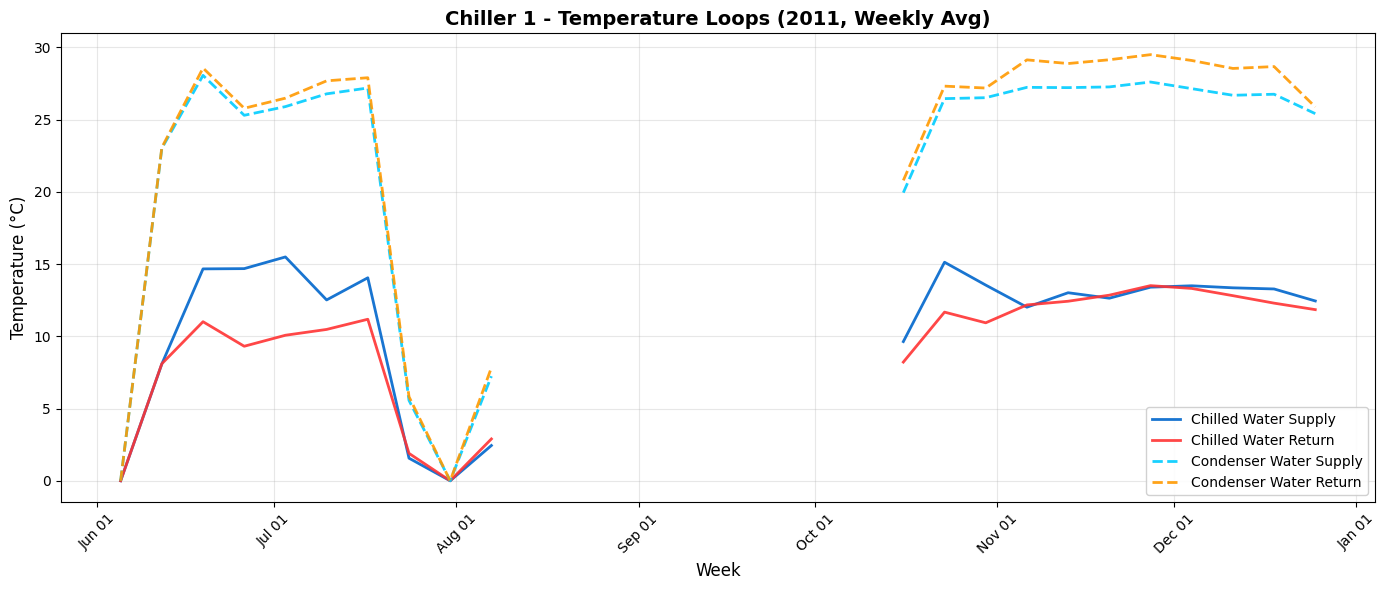

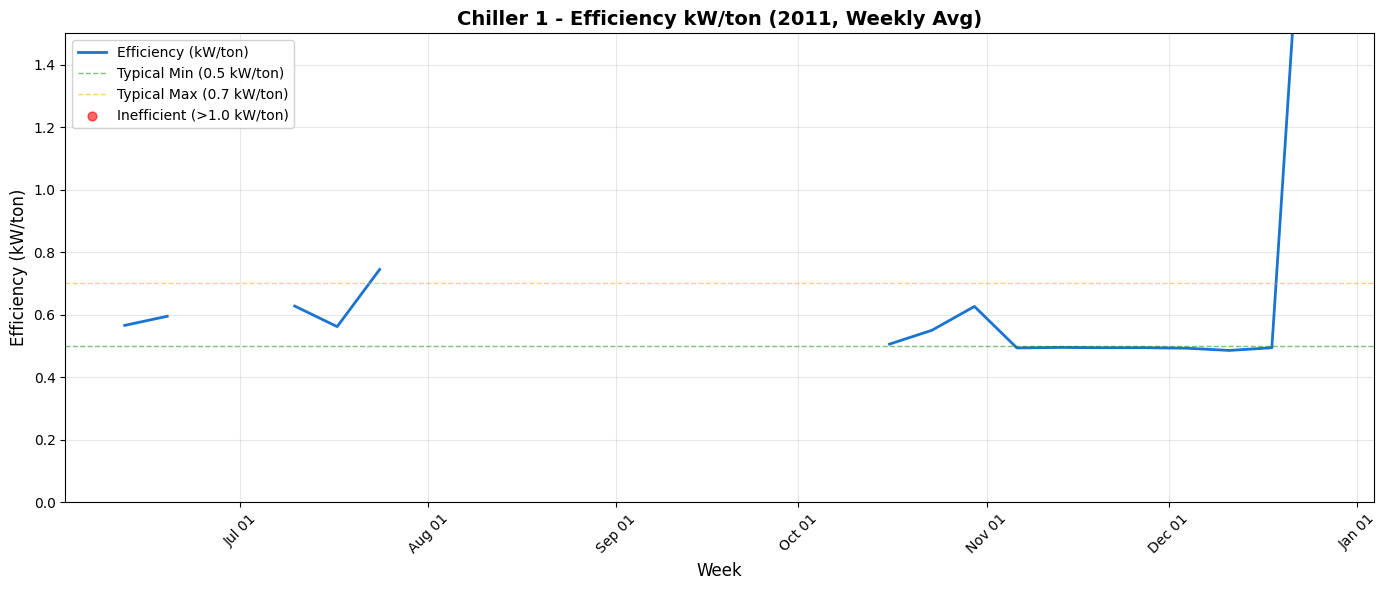

    Chilled Water Supply: 10.74°C avg
    Chilled Water Return: 9.38°C avg
    Condenser Water Supply: 21.77°C avg
    Condenser Water Return: 22.73°C avg
    Efficiency: 0.664 kW/ton avg (min: 0.485, max: 2.573)

  --- Year 2012 (53 weekly data points) ---


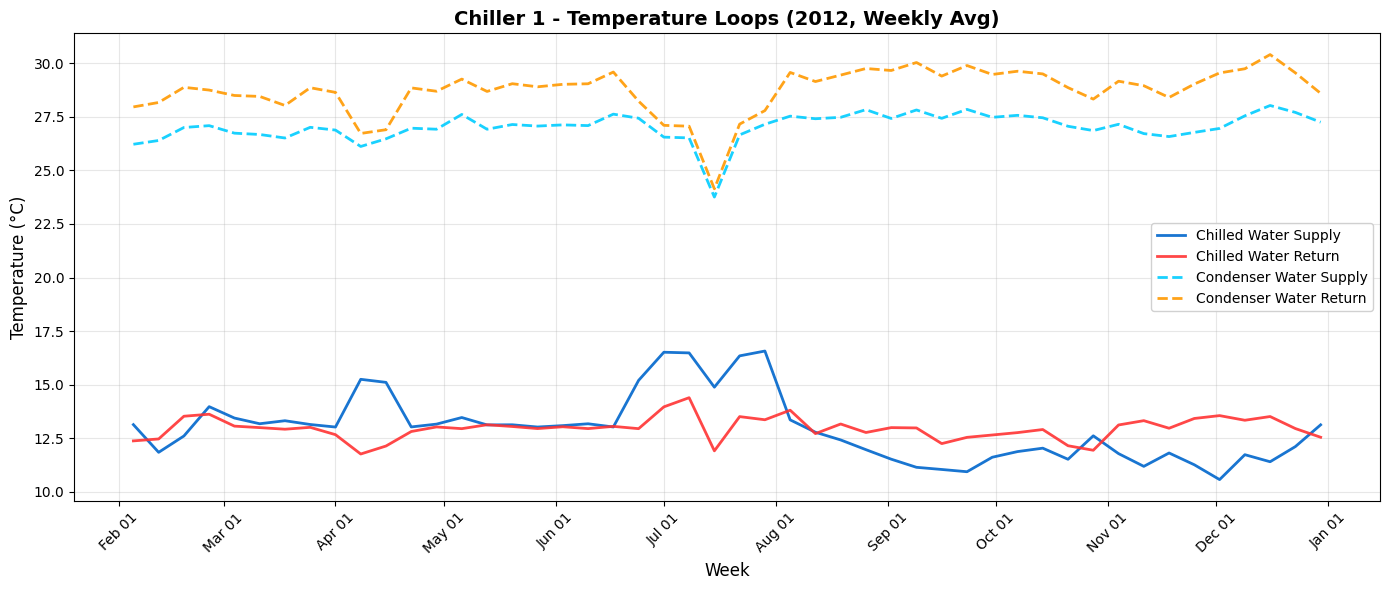

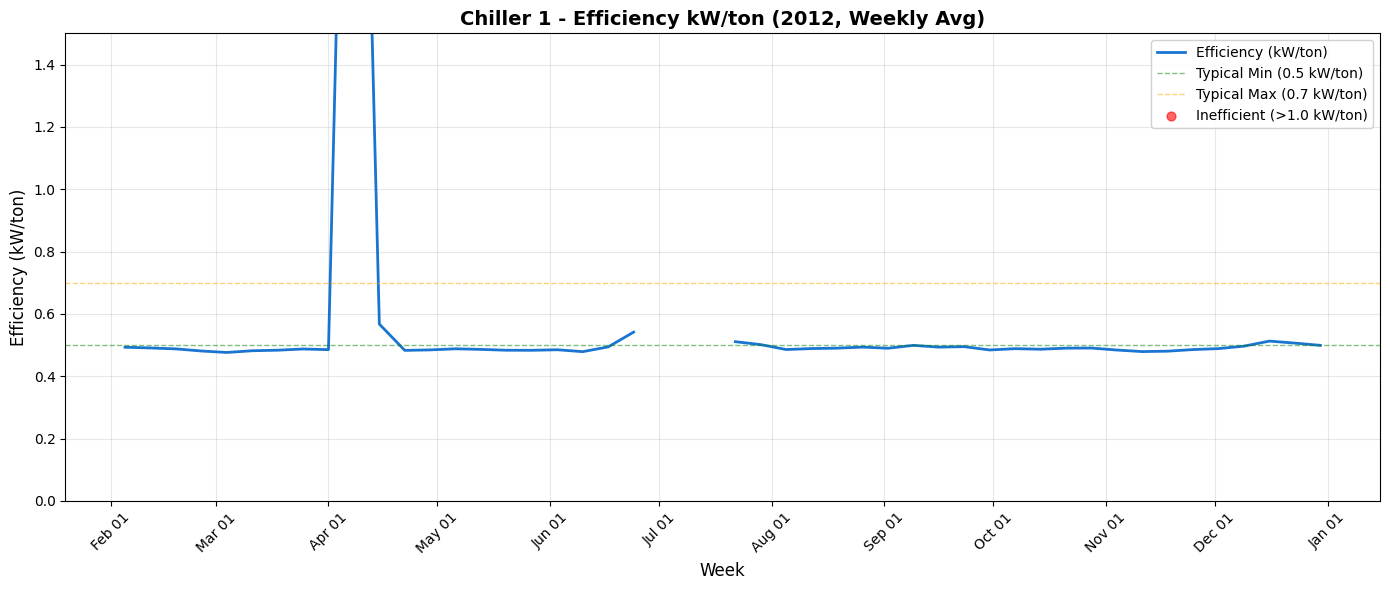

    Chilled Water Supply: 12.96°C avg
    Chilled Water Return: 12.96°C avg
    Condenser Water Supply: 27.03°C avg
    Condenser Water Return: 28.72°C avg
    Efficiency: 0.566 kW/ton avg (min: 0.476, max: 3.835)

  --- Year 2013 (52 weekly data points) ---


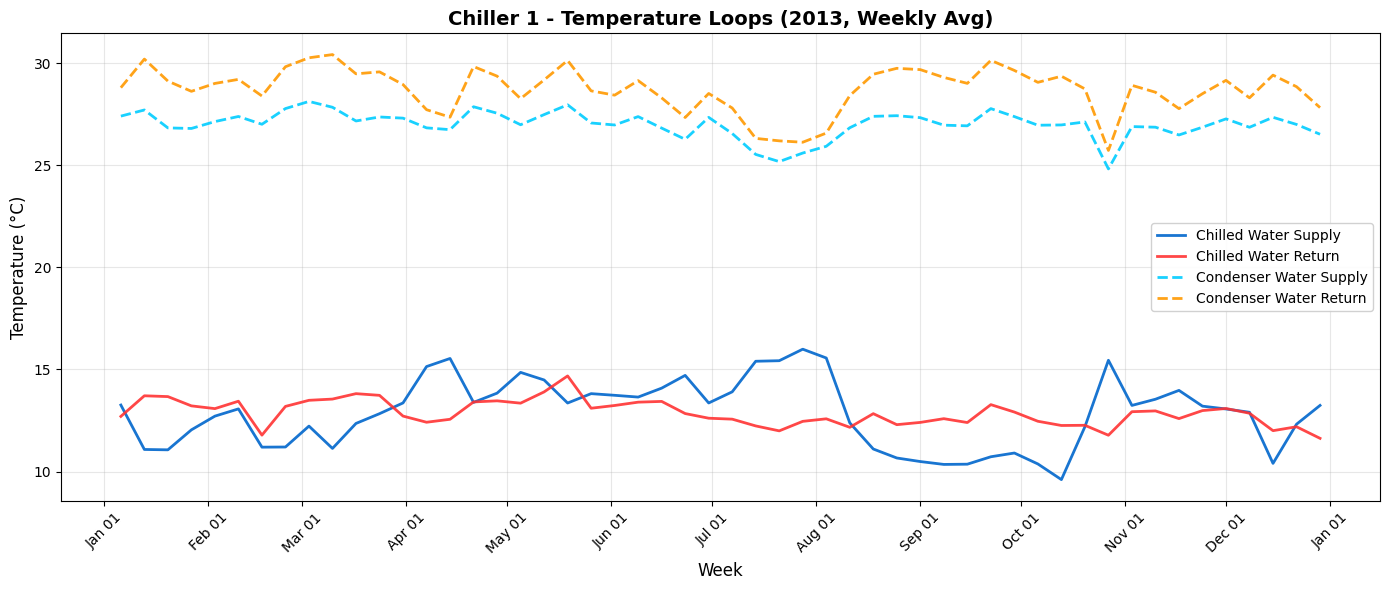

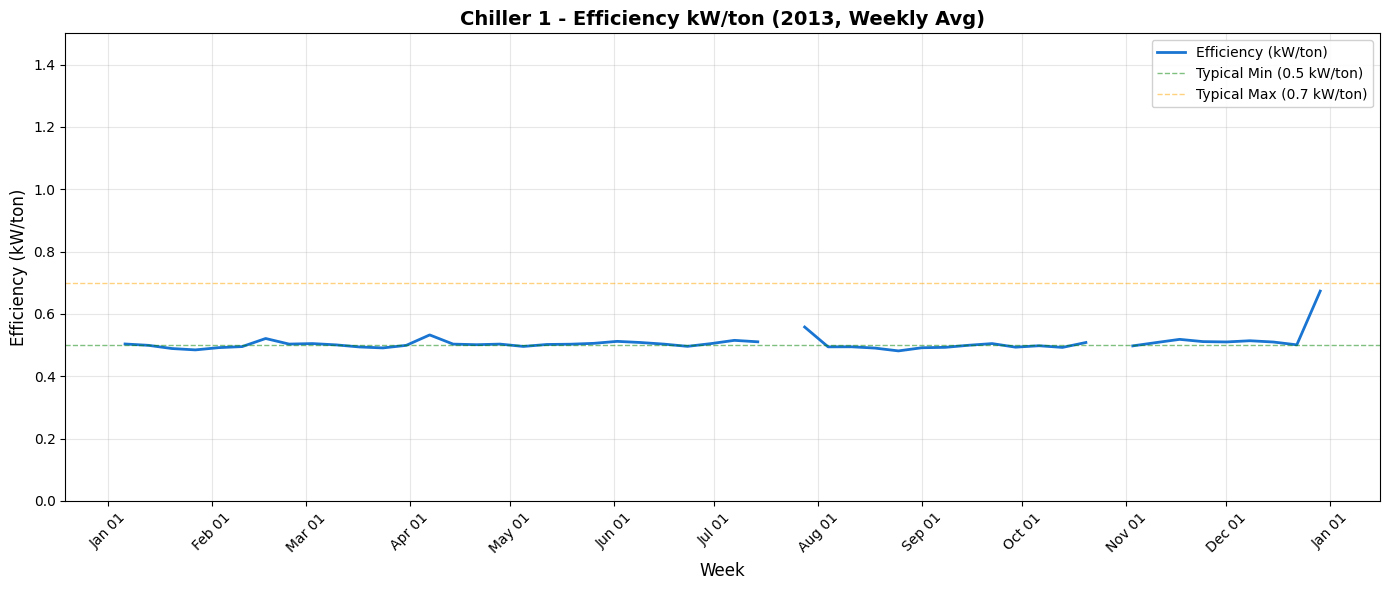

    Chilled Water Supply: 12.85°C avg
    Chilled Water Return: 12.87°C avg
    Condenser Water Supply: 27.00°C avg
    Condenser Water Return: 28.71°C avg
    Efficiency: 0.506 kW/ton avg (min: 0.481, max: 0.673)

  --- Year 2014 (15 weekly data points) ---


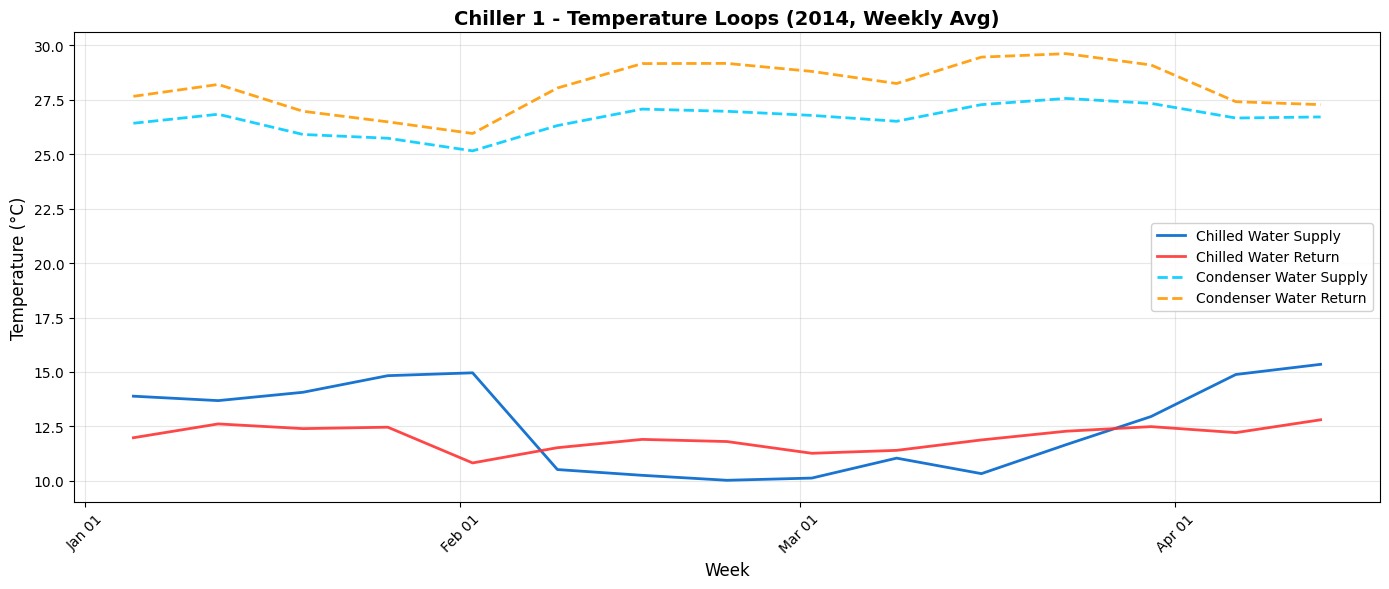

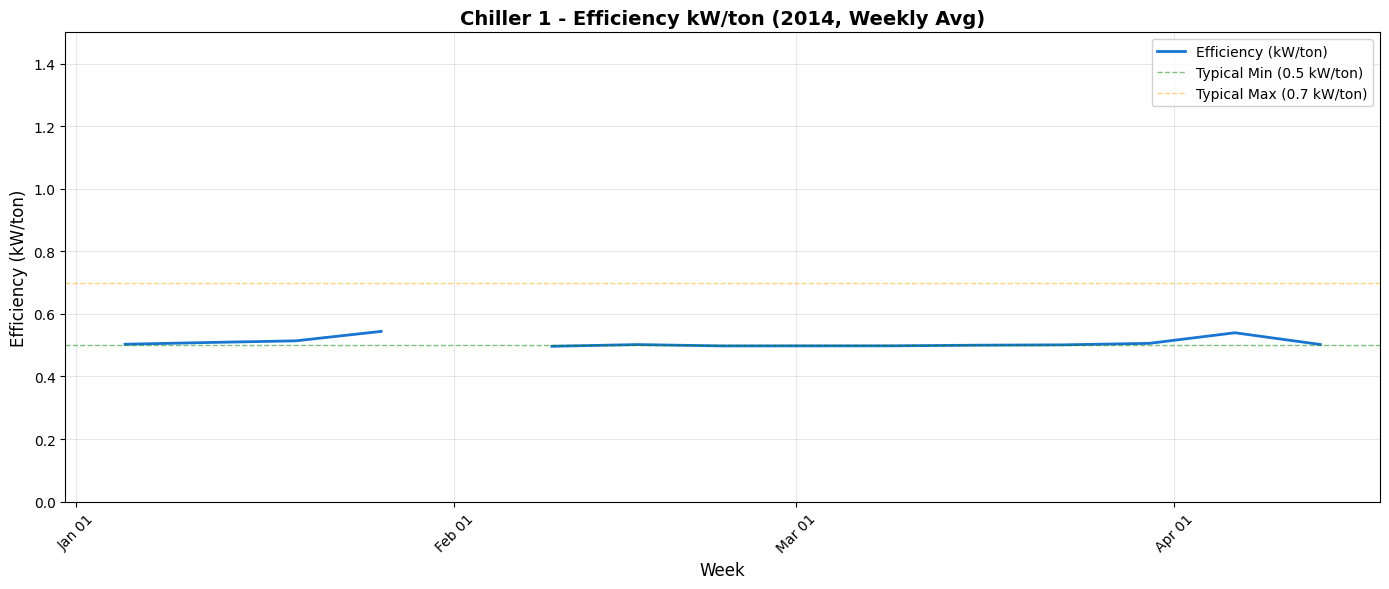

    Chilled Water Supply: 12.57°C avg
    Chilled Water Return: 11.99°C avg
    Condenser Water Supply: 26.61°C avg
    Condenser Water Return: 28.10°C avg
    Efficiency: 0.508 kW/ton avg (min: 0.497, max: 0.544)

CHILLER 2

  --- Year 2011 (30 weekly data points) ---


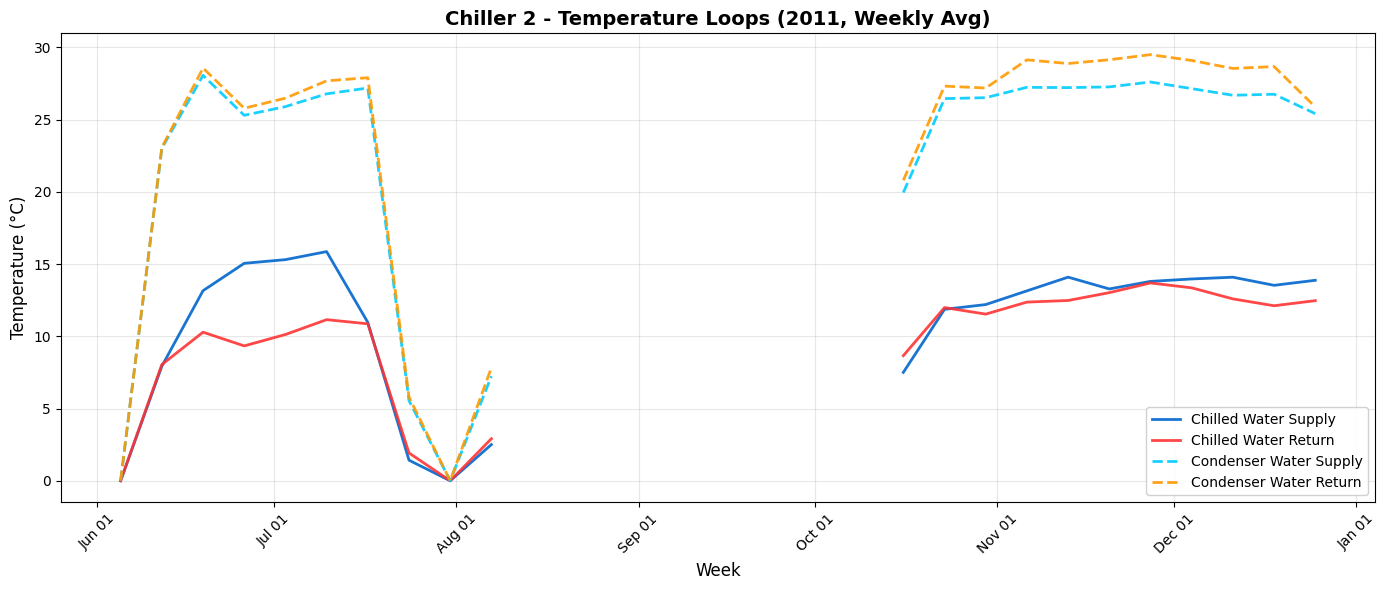

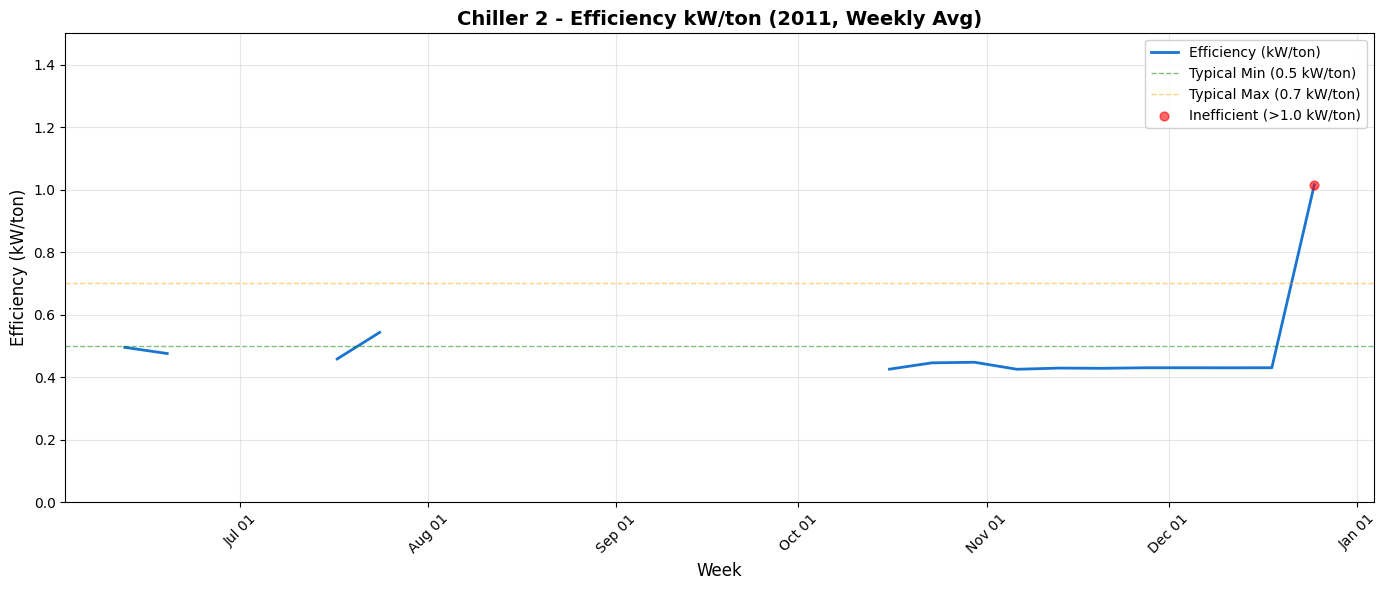

    Chilled Water Supply: 10.64°C avg
    Chilled Water Return: 9.47°C avg
    Condenser Water Supply: 21.77°C avg
    Condenser Water Return: 22.72°C avg
    Efficiency: 0.483 kW/ton avg (min: 0.425, max: 1.015)

  --- Year 2012 (53 weekly data points) ---


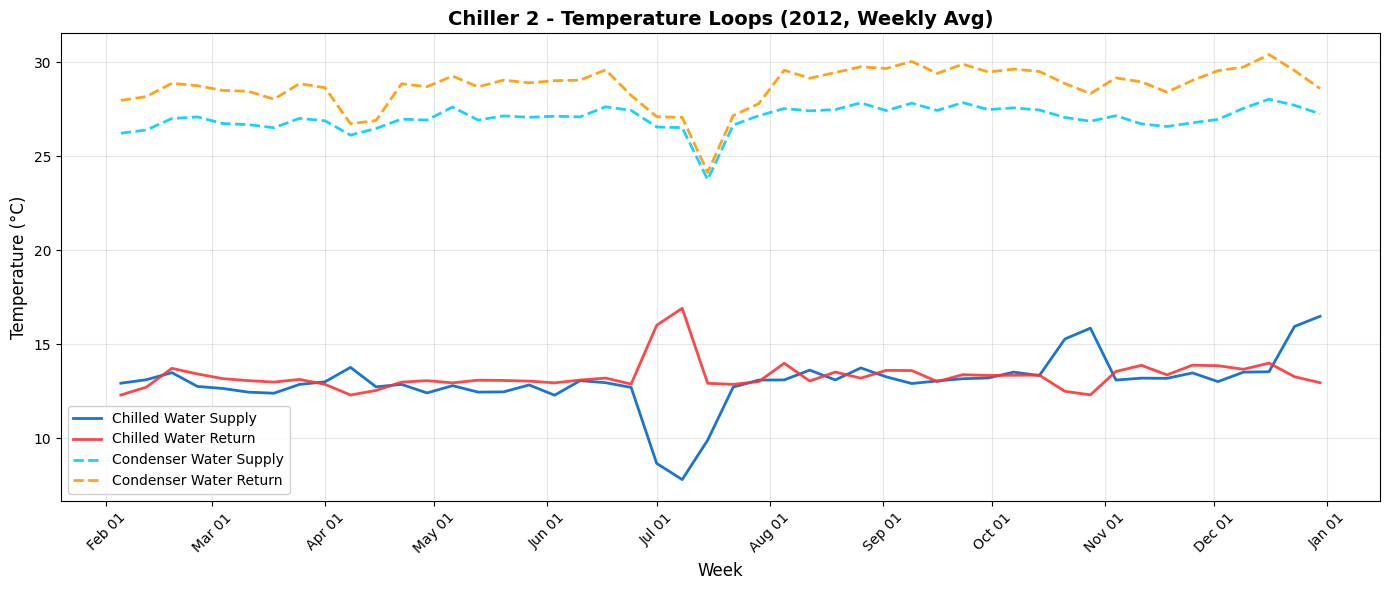

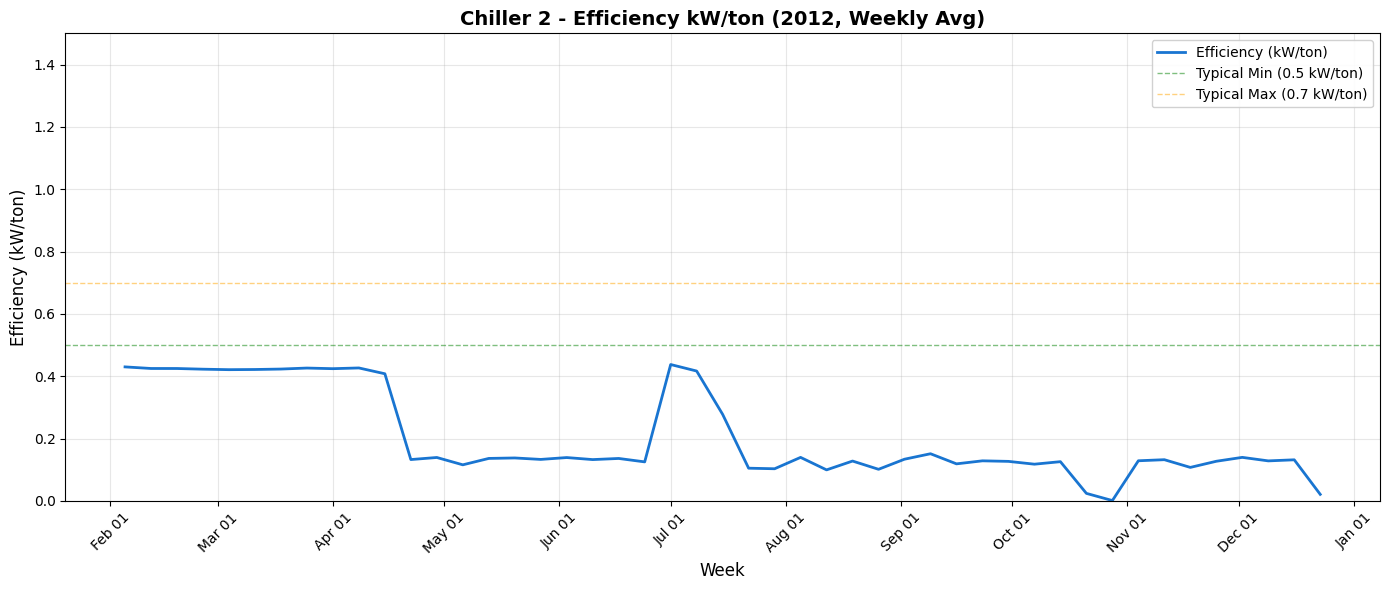

    Chilled Water Supply: 13.00°C avg
    Chilled Water Return: 13.31°C avg
    Condenser Water Supply: 27.03°C avg
    Condenser Water Return: 28.72°C avg
    Efficiency: 0.205 kW/ton avg (min: 0.001, max: 0.437)

  --- Year 2013 (52 weekly data points) ---


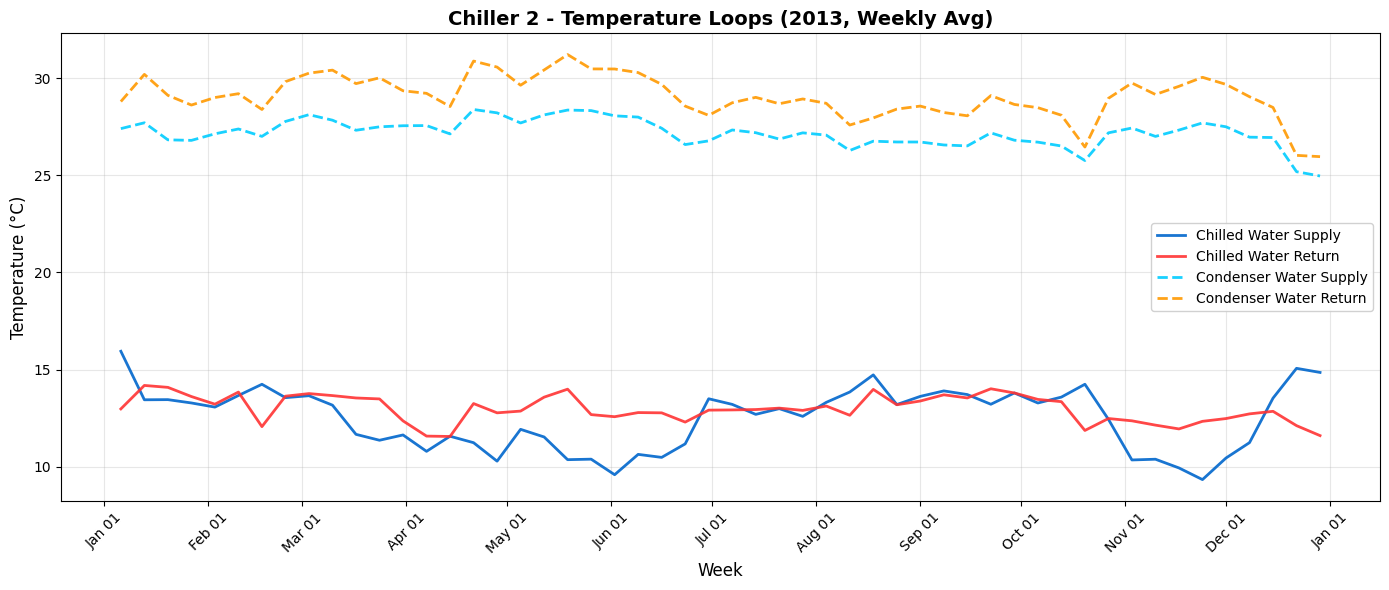

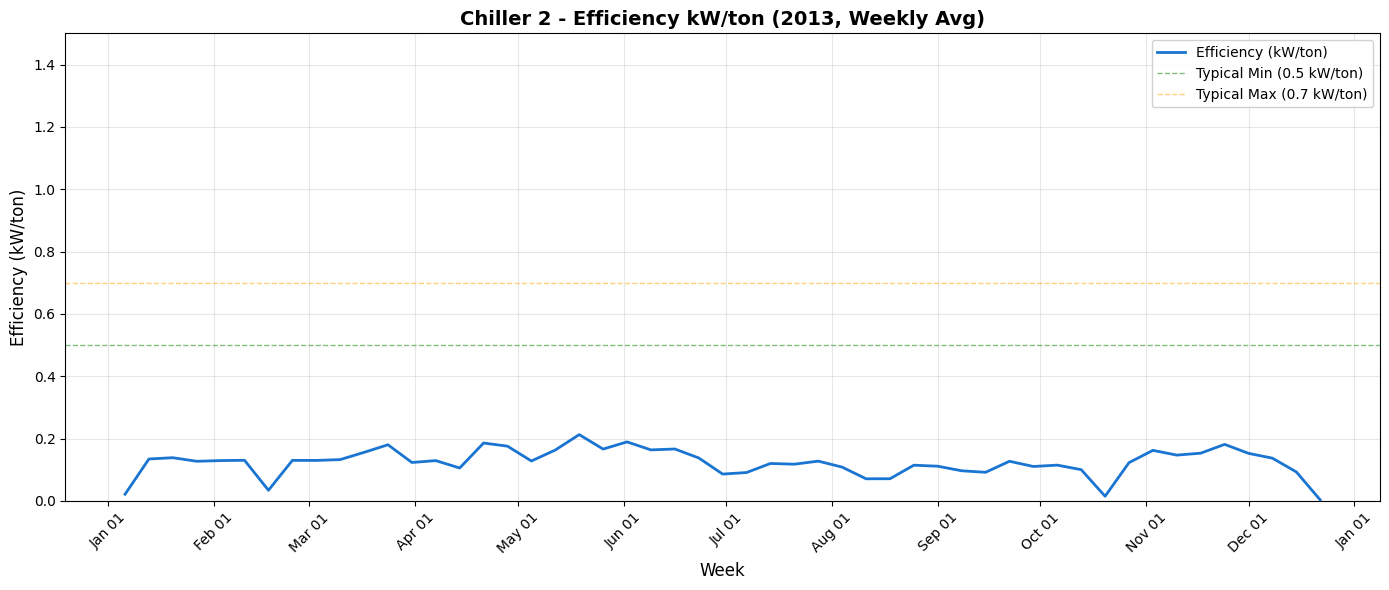

    Chilled Water Supply: 12.48°C avg
    Chilled Water Return: 12.98°C avg
    Condenser Water Supply: 27.18°C avg
    Condenser Water Return: 29.07°C avg
    Efficiency: 0.124 kW/ton avg (min: 0.003, max: 0.212)

  --- Year 2014 (15 weekly data points) ---


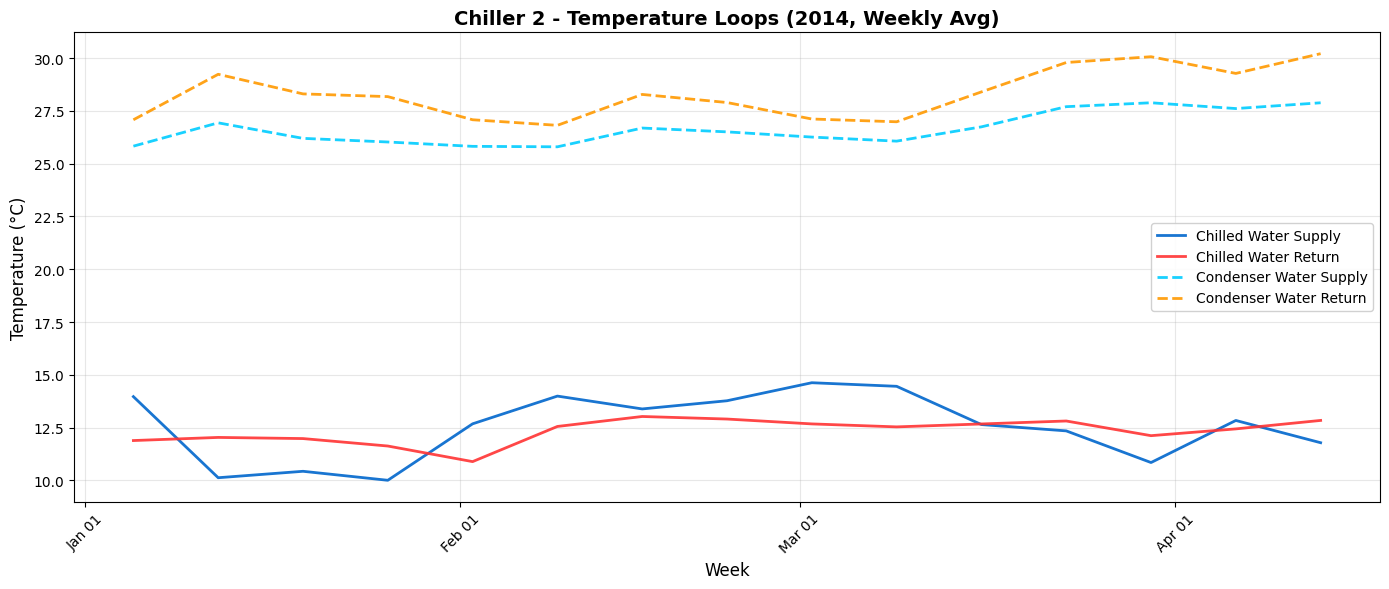

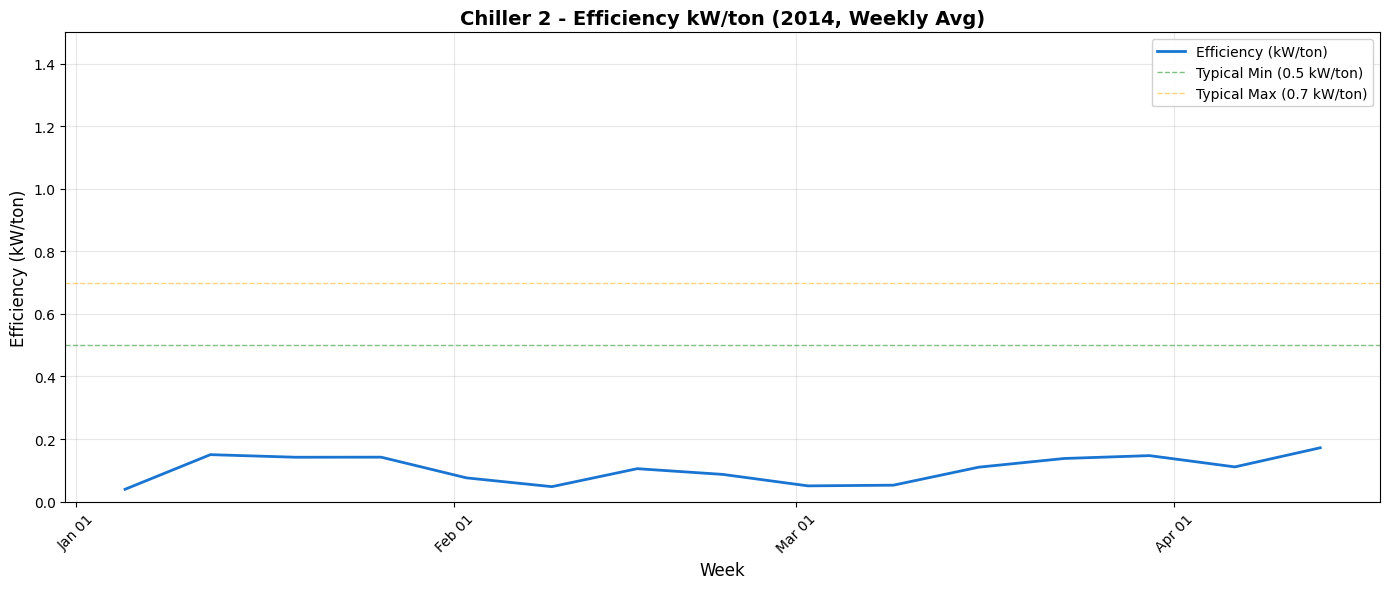

    Chilled Water Supply: 12.52°C avg
    Chilled Water Return: 12.33°C avg
    Condenser Water Supply: 26.67°C avg
    Condenser Water Return: 28.32°C avg
    Efficiency: 0.105 kW/ton avg (min: 0.039, max: 0.172)

CHILLER 3

  --- Year 2011 (30 weekly data points) ---


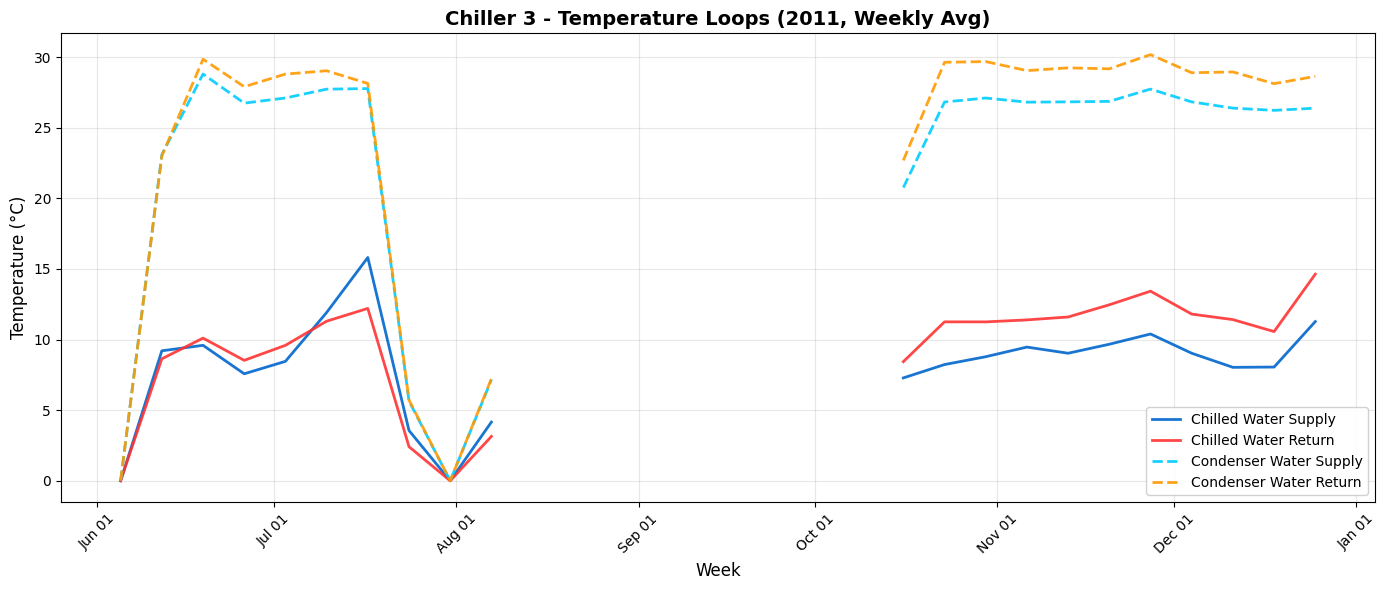

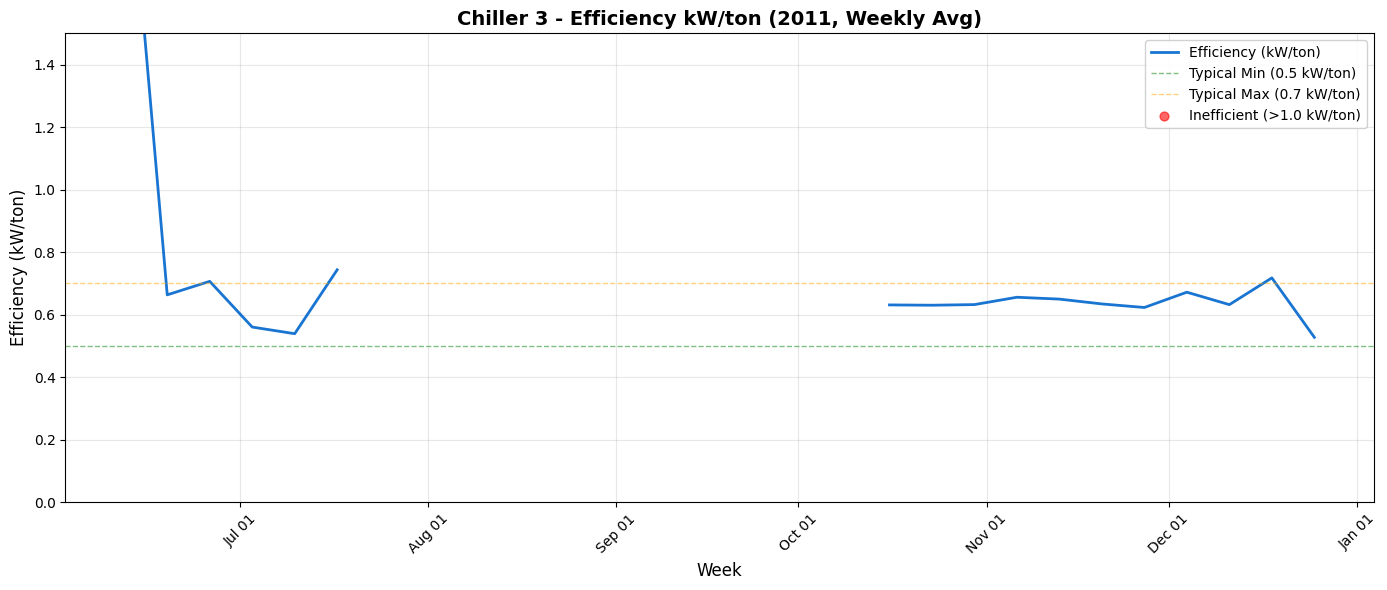

    Chilled Water Supply: 8.07°C avg
    Chilled Water Return: 9.25°C avg
    Condenser Water Supply: 22.04°C avg
    Condenser Water Return: 23.52°C avg
    Efficiency: 0.732 kW/ton avg (min: 0.527, max: 2.226)

  --- Year 2012 (53 weekly data points) ---


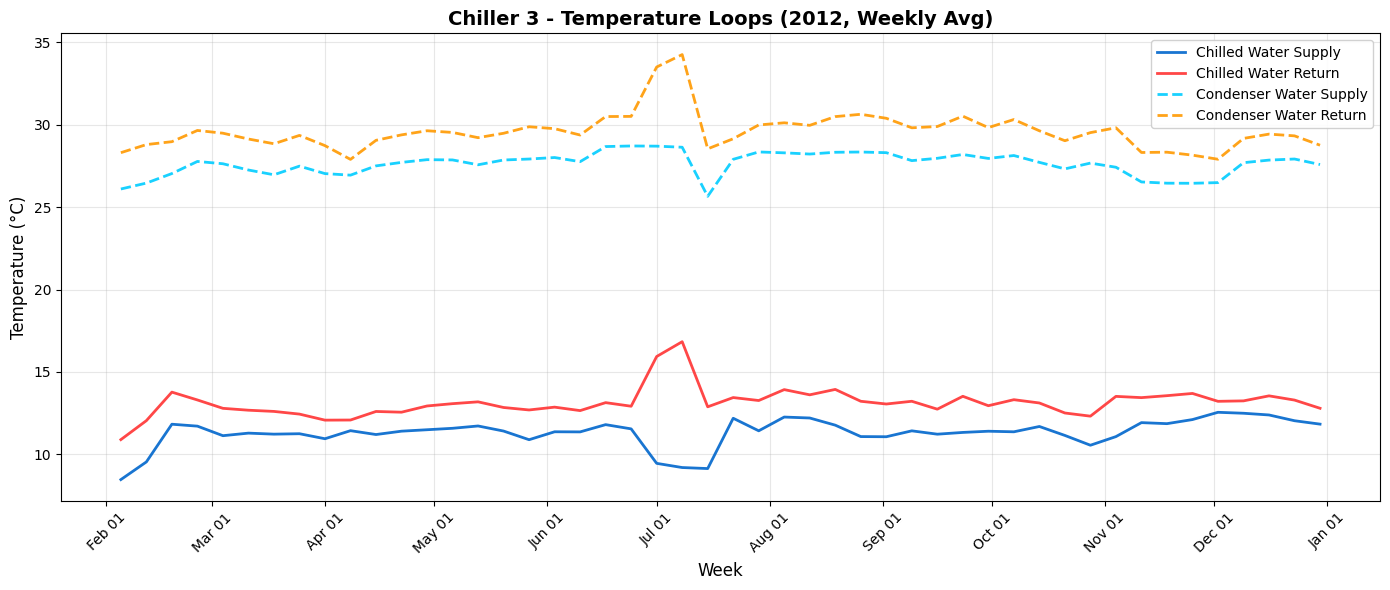

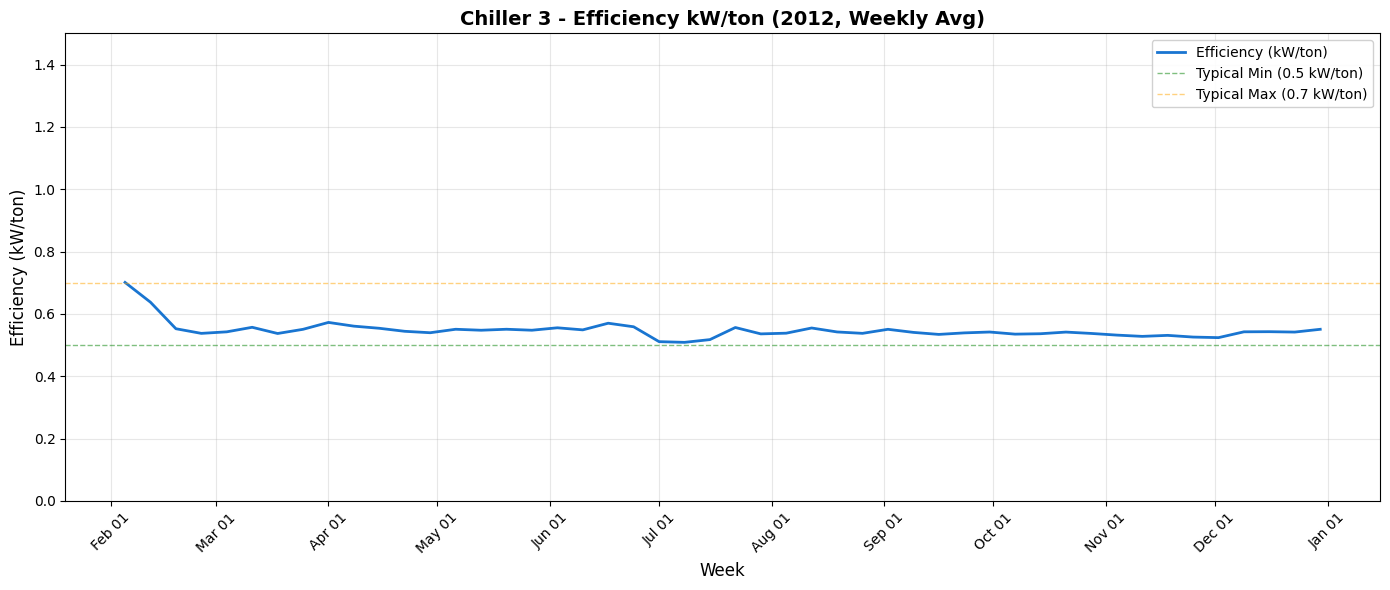

    Chilled Water Supply: 11.31°C avg
    Chilled Water Return: 13.13°C avg
    Condenser Water Supply: 27.62°C avg
    Condenser Water Return: 29.59°C avg
    Efficiency: 0.548 kW/ton avg (min: 0.509, max: 0.701)

  --- Year 2013 (52 weekly data points) ---


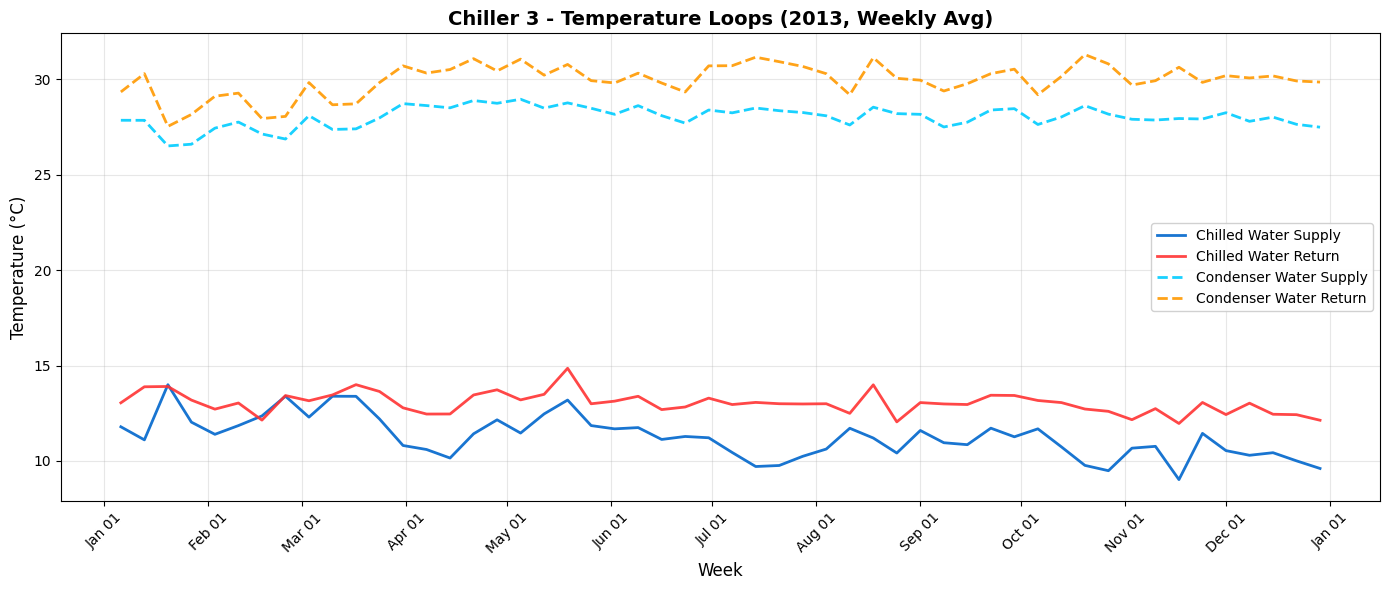

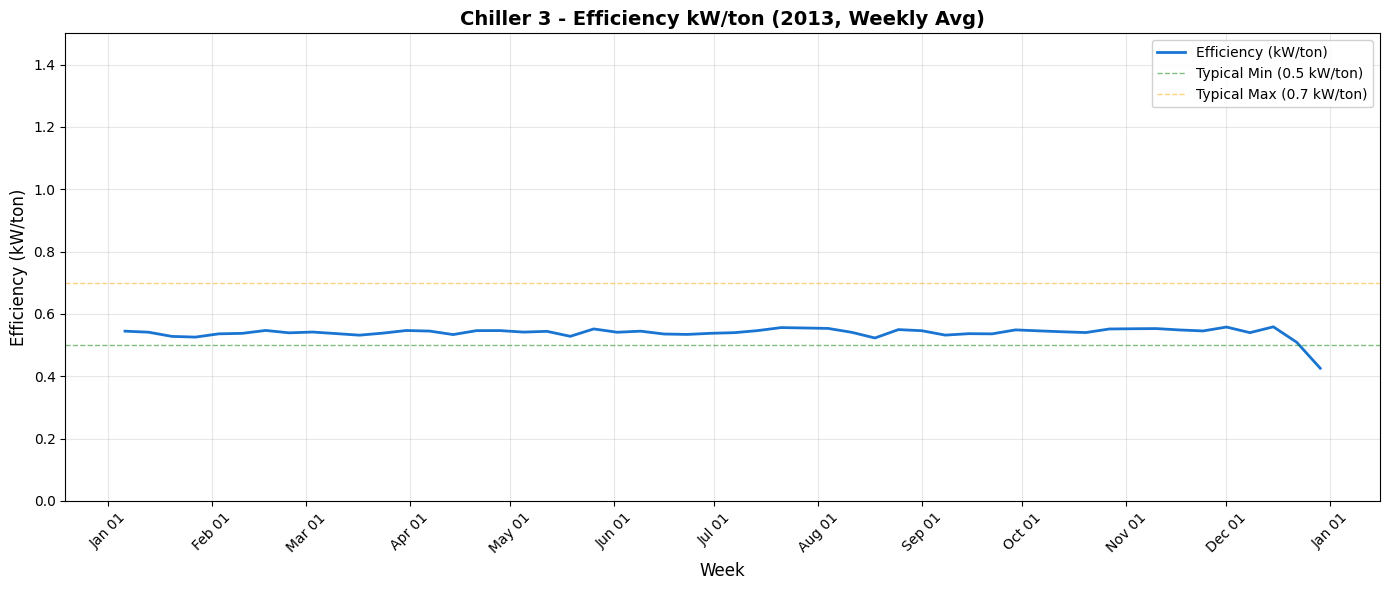

    Chilled Water Supply: 11.26°C avg
    Chilled Water Return: 13.03°C avg
    Condenser Water Supply: 28.03°C avg
    Condenser Water Return: 29.96°C avg
    Efficiency: 0.539 kW/ton avg (min: 0.425, max: 0.558)

  --- Year 2014 (15 weekly data points) ---


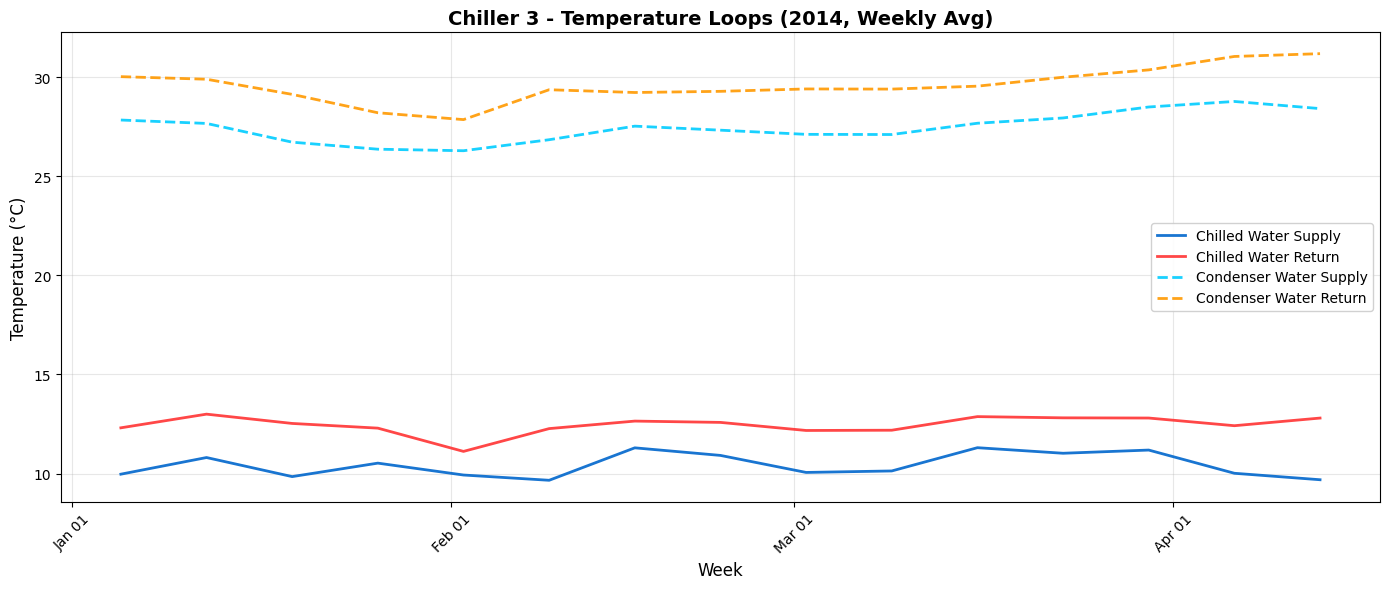

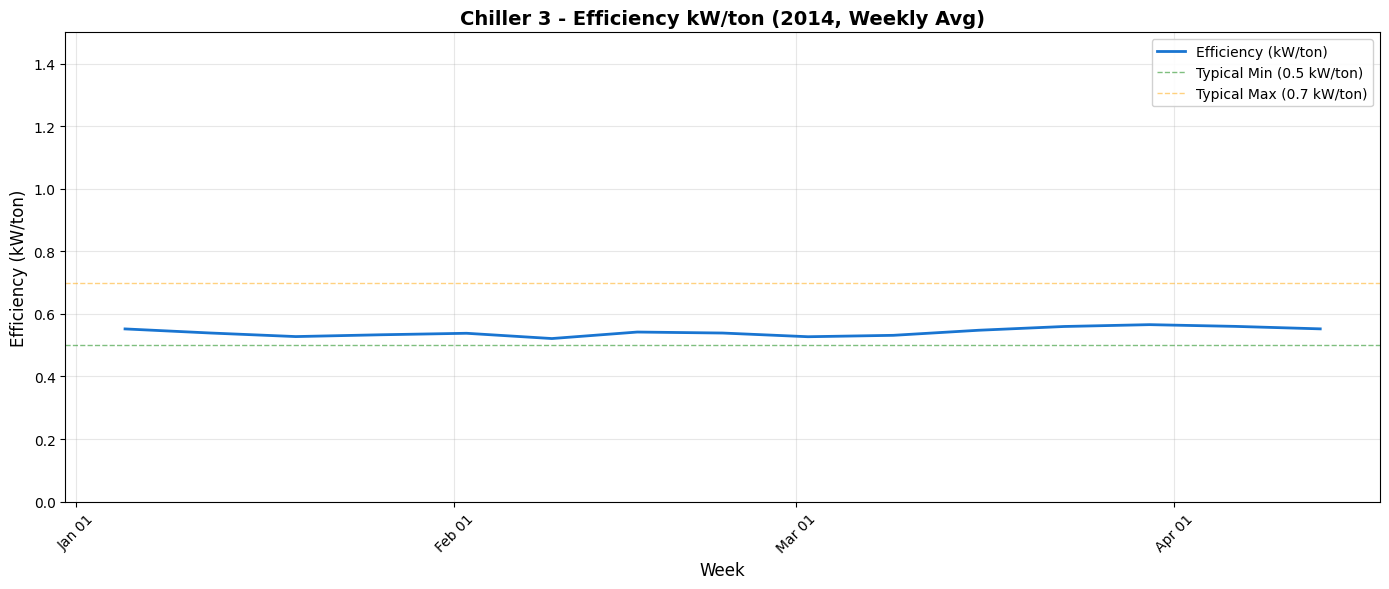

    Chilled Water Supply: 10.42°C avg
    Chilled Water Return: 12.45°C avg
    Condenser Water Supply: 27.48°C avg
    Condenser Water Return: 29.60°C avg
    Efficiency: 0.542 kW/ton avg (min: 0.521, max: 0.566)


In [9]:
# Per-Chiller, Per-Year Analysis: Temperature Loops and kW/ton
print("=" * 60)
print("PER-CHILLER, PER-YEAR EXPLORATORY ANALYSIS")
print("=" * 60)

chillers = [1, 2, 3]
years = sorted(df_weekly_resampled['year'].unique())

print(f"Chillers: {chillers}")
print(f"Years: {years}")
print(f"Total graphs: {len(chillers)} chillers x {len(years)} years x 2 plots = {len(chillers)*len(years)*2}")

for chiller_num in chillers:
    print(f"\n{'='*60}")
    print(f"CHILLER {chiller_num}")
    print(f"{'='*60}")
    
    # Column names for this chiller
    prefix = f'CP_Chiller{chiller_num}_'
    chw_supply_col = f'{prefix}ChilledWaterSupplyTemp'
    chw_return_col = f'{prefix}ChilledWaterReturnTemp'
    cond_supply_col = f'{prefix}CondenserWaterSupplyTemp'
    cond_return_col = f'{prefix}CondenserWaterReturnTemp'
    cooling_tons_col = f'{prefix}CoolingTons'
    chiller_kw_col = f'{prefix}kW'
    
    for year in years:
        # Filter data for this year
        df_year = df_weekly_resampled[df_weekly_resampled['year'] == year].copy()
        
        if len(df_year) == 0:
            print(f"\n  Year {year}: No data, skipping.")
            continue
        
        print(f"\n  --- Year {year} ({len(df_year)} weekly data points) ---")
        
        # ── Graph 1: Chilled Water & Condenser Water Loops ──
        fig, ax = plt.subplots(figsize=(14, 6))
        
        # Chilled Water Loop
        ax.plot(df_year['timestamp'], df_year[chw_supply_col], 
                label='Chilled Water Supply', linewidth=2, alpha=0.9, color='#0066CC', linestyle='-')
        ax.plot(df_year['timestamp'], df_year[chw_return_col], 
                label='Chilled Water Return', linewidth=2, alpha=0.9, color='#FF3333', linestyle='-')
        
        # Condenser Water Loop
        ax.plot(df_year['timestamp'], df_year[cond_supply_col], 
                label='Condenser Water Supply', linewidth=2, alpha=0.9, color='#00CCFF', linestyle='--')
        ax.plot(df_year['timestamp'], df_year[cond_return_col], 
                label='Condenser Water Return', linewidth=2, alpha=0.9, color='#FF9900', linestyle='--')
        
        ax.set_xlabel('Week', fontsize=12)
        ax.set_ylabel('Temperature (°C)', fontsize=12)
        ax.set_title(f'Chiller {chiller_num} - Temperature Loops ({year}, Weekly Avg)', 
                     fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best', fontsize=10, framealpha=0.9)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # ── Graph 2: kW per Cooling Ton (Efficiency) ──
        fig, ax = plt.subplots(figsize=(14, 6))
        
        chiller_efficiency = np.where(
            df_year[cooling_tons_col] > 0,
            df_year[chiller_kw_col] / df_year[cooling_tons_col],
            np.nan
        )
        
        ax.plot(df_year['timestamp'], chiller_efficiency, 
                label='Efficiency (kW/ton)', linewidth=2, alpha=0.9, color='#0066CC')
        
        # Reference lines
        ax.axhline(y=0.5, color='green', linestyle='--', linewidth=1, alpha=0.5, 
                   label='Typical Min (0.5 kW/ton)')
        ax.axhline(y=0.7, color='orange', linestyle='--', linewidth=1, alpha=0.5, 
                   label='Typical Max (0.7 kW/ton)')
        
        # Flag inefficient weeks
        inefficient_mask = np.array(chiller_efficiency) > 1.0
        if np.nansum(inefficient_mask) > 0:
            ax.scatter(df_year.loc[inefficient_mask, 'timestamp'].values, 
                       np.array(chiller_efficiency)[inefficient_mask],
                       color='red', s=40, alpha=0.6, label='Inefficient (>1.0 kW/ton)', zorder=5)
        
        ax.set_xlabel('Week', fontsize=12)
        ax.set_ylabel('Efficiency (kW/ton)', fontsize=12)
        ax.set_ylim(0, 1.5)
        ax.set_title(f'Chiller {chiller_num} - Efficiency kW/ton ({year}, Weekly Avg)', 
                     fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best', fontsize=10, framealpha=0.9)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Year summary stats
        eff_valid = np.array(chiller_efficiency)[~np.isnan(chiller_efficiency)]
        print(f"    Chilled Water Supply: {df_year[chw_supply_col].mean():.2f}°C avg")
        print(f"    Chilled Water Return: {df_year[chw_return_col].mean():.2f}°C avg")
        print(f"    Condenser Water Supply: {df_year[cond_supply_col].mean():.2f}°C avg")
        print(f"    Condenser Water Return: {df_year[cond_return_col].mean():.2f}°C avg")
        if len(eff_valid) > 0:
            print(f"    Efficiency: {np.mean(eff_valid):.3f} kW/ton avg (min: {np.min(eff_valid):.3f}, max: {np.max(eff_valid):.3f})")
        else:
            print(f"    Efficiency: No valid data (chiller may have been off)")

TOTAL CHILLED WATER FLOWRATE vs PUMP kW — PER YEAR (DAILY)
Flowrate columns summed: ['CP_Chiller1_ChilledWaterFlowrate', 'CP_Chiller2_ChilledWaterFlowrate', 'CP_Chiller3_ChilledWaterFlowrate']
Daily dataset: 1044 rows
Years: [2011, 2012, 2013, 2014]

--- Year 2011 (214 daily data points) ---


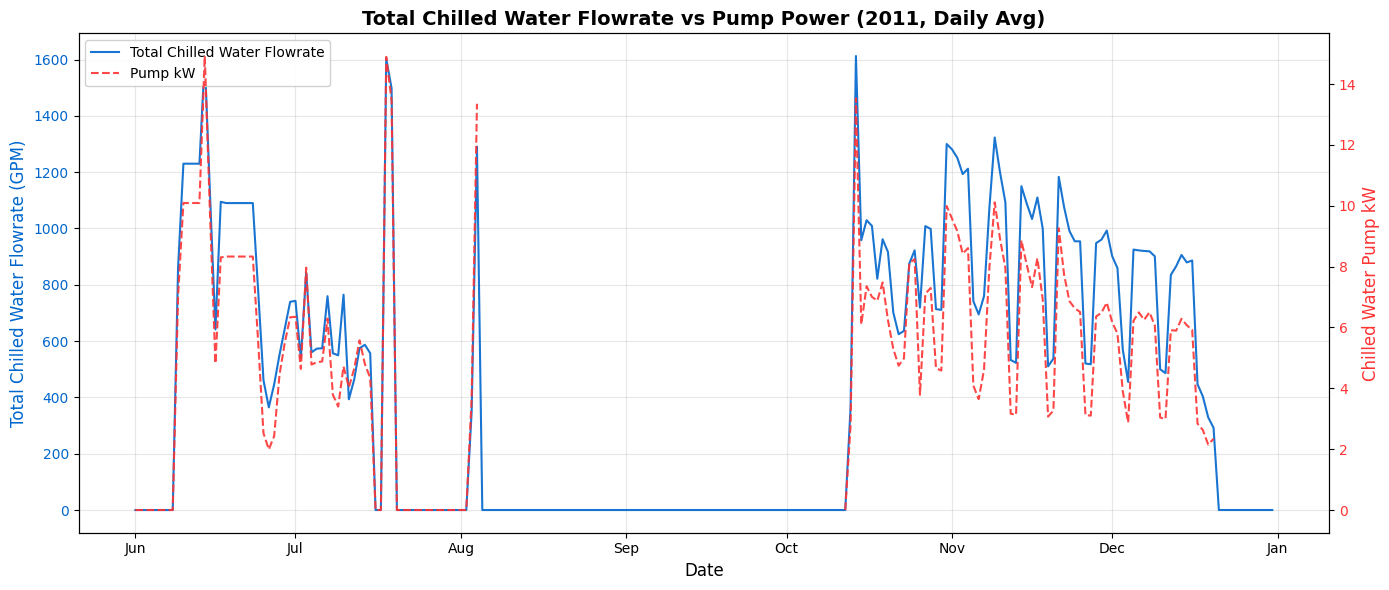

  Total Flowrate — mean: 439.4, max: 1612.3
  Pump kW — mean: 5.2, max: 14.9
  Correlation (flowrate vs pump kW): 0.952

--- Year 2012 (366 daily data points) ---


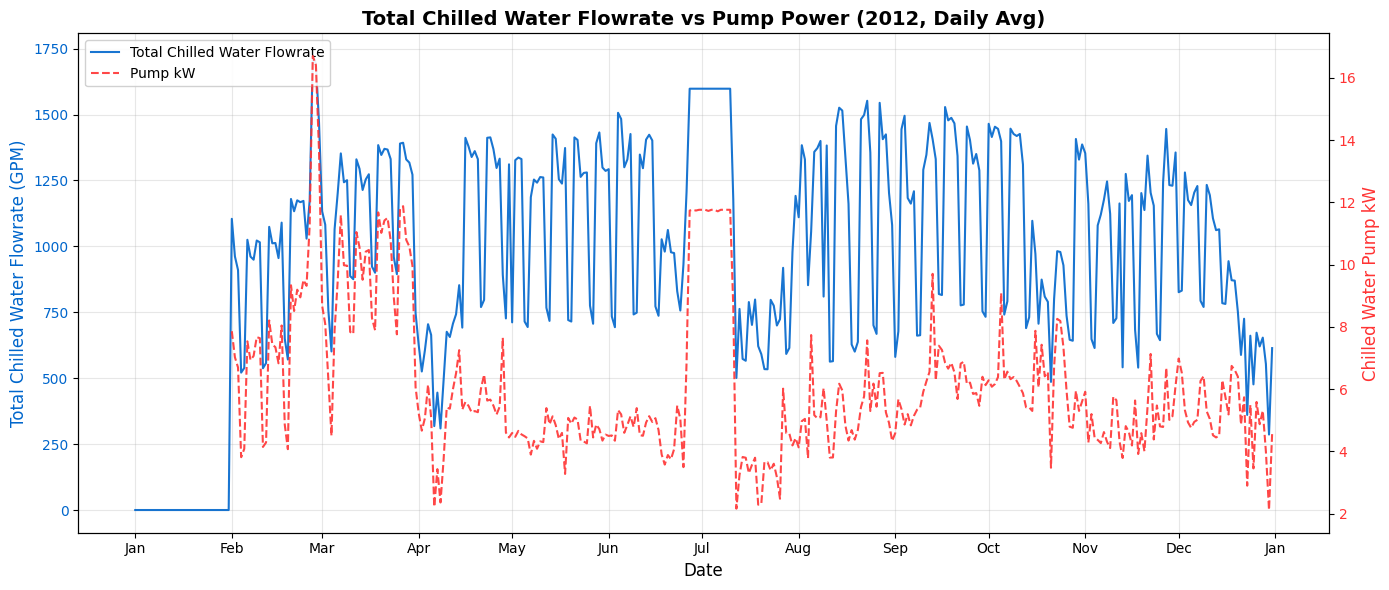

  Total Flowrate — mean: 969.6, max: 1721.8
  Pump kW — mean: 6.1, max: 16.7
  Correlation (flowrate vs pump kW): 0.480

--- Year 2013 (365 daily data points) ---


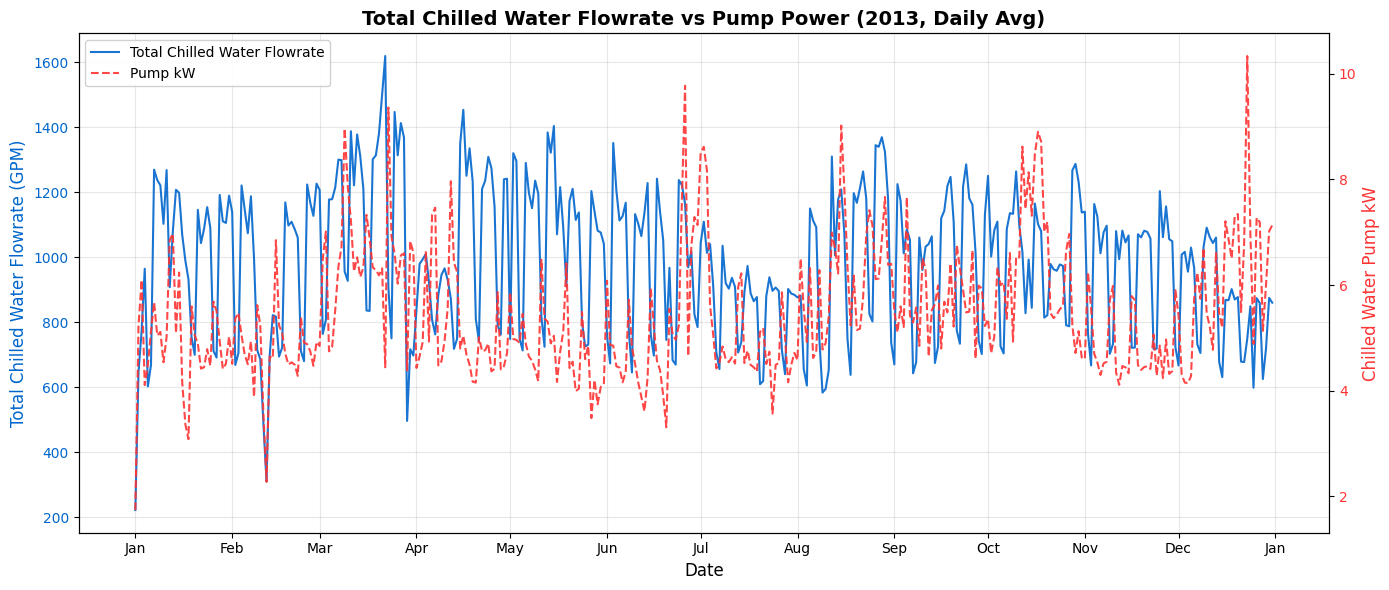

  Total Flowrate — mean: 986.8, max: 1619.7
  Pump kW — mean: 5.5, max: 10.3
  Correlation (flowrate vs pump kW): -0.020

--- Year 2014 (99 daily data points) ---


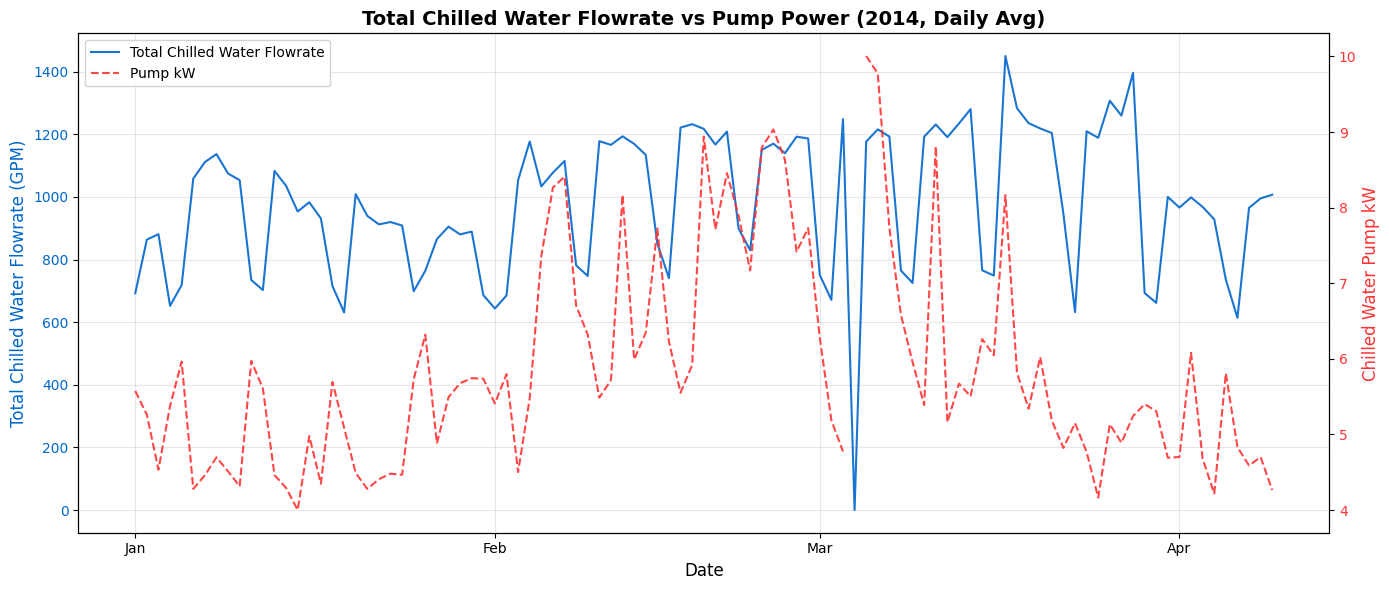

  Total Flowrate — mean: 979.8, max: 1449.9
  Pump kW — mean: 5.9, max: 10.0
  Correlation (flowrate vs pump kW): 0.236


In [10]:
# Total Chilled Water Flowrate vs Pump kW — Per Year (Daily)
print("=" * 60)
print("TOTAL CHILLED WATER FLOWRATE vs PUMP kW — PER YEAR (DAILY)")
print("=" * 60)

# Create daily resampled dataset from the 3-min combined data
df_daily_indexed = df_combined.set_index('timestamp').copy()
numeric_cols_daily = df_daily_indexed.select_dtypes(include=[np.number]).columns.tolist()
df_daily = df_daily_indexed[numeric_cols_daily].resample('D').mean().reset_index()
df_daily['year'] = df_daily['timestamp'].dt.year

# Sum all chiller flowrates into one total
flowrate_cols = [col for col in df_daily.columns if 'ChilledWaterFlowrate' in col]
df_daily['Total_ChilledWaterFlowrate'] = df_daily[flowrate_cols].sum(axis=1)

print(f"Flowrate columns summed: {flowrate_cols}")
print(f"Daily dataset: {len(df_daily)} rows")
print(f"Years: {sorted(df_daily['year'].unique())}")

years = sorted(df_daily['year'].unique())

for year in years:
    df_year = df_daily[df_daily['year'] == year].copy()
    
    if len(df_year) == 0:
        print(f"\nYear {year}: No data, skipping.")
        continue
    
    print(f"\n--- Year {year} ({len(df_year)} daily data points) ---")
    
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Left axis: Total Chilled Water Flowrate
    color1 = '#0066CC'
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Total Chilled Water Flowrate (GPM)', fontsize=12, color=color1)
    line1 = ax1.plot(df_year['timestamp'], df_year['Total_ChilledWaterFlowrate'],
                     label='Total Chilled Water Flowrate', color=color1, linewidth=1.5, alpha=0.9)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(True, alpha=0.3)
    
    # Right axis: Pump kW
    ax2 = ax1.twinx()
    color2 = '#FF3333'
    ax2.set_ylabel('Chilled Water Pump kW', fontsize=12, color=color2)
    line2 = ax2.plot(df_year['timestamp'], df_year['CP_TotalChilledWaterPump_kW'],
                     label='Pump kW', color=color2, linewidth=1.5, alpha=0.9, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color2)
    
    # Combined legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', fontsize=10, framealpha=0.9)
    
    ax1.set_title(f'Total Chilled Water Flowrate vs Pump Power ({year}, Daily Avg)',
                  fontsize=14, fontweight='bold')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Summary
    print(f"  Total Flowrate — mean: {df_year['Total_ChilledWaterFlowrate'].mean():.1f}, "
          f"max: {df_year['Total_ChilledWaterFlowrate'].max():.1f}")
    print(f"  Pump kW — mean: {df_year['CP_TotalChilledWaterPump_kW'].mean():.1f}, "
          f"max: {df_year['CP_TotalChilledWaterPump_kW'].max():.1f}")
    
    # Correlation for this year
    valid = df_year[['Total_ChilledWaterFlowrate', 'CP_TotalChilledWaterPump_kW']].dropna()
    valid = valid[(valid['Total_ChilledWaterFlowrate'] > 0) | (valid['CP_TotalChilledWaterPump_kW'] > 0)]
    if len(valid) > 2:
        corr = valid.corr().iloc[0, 1]
        print(f"  Correlation (flowrate vs pump kW): {corr:.3f}")

2. CONDENSER WATER LOOP - TIME SERIES
Purpose: Confirm heat rejection behavior (return > supply, response to load and weather)


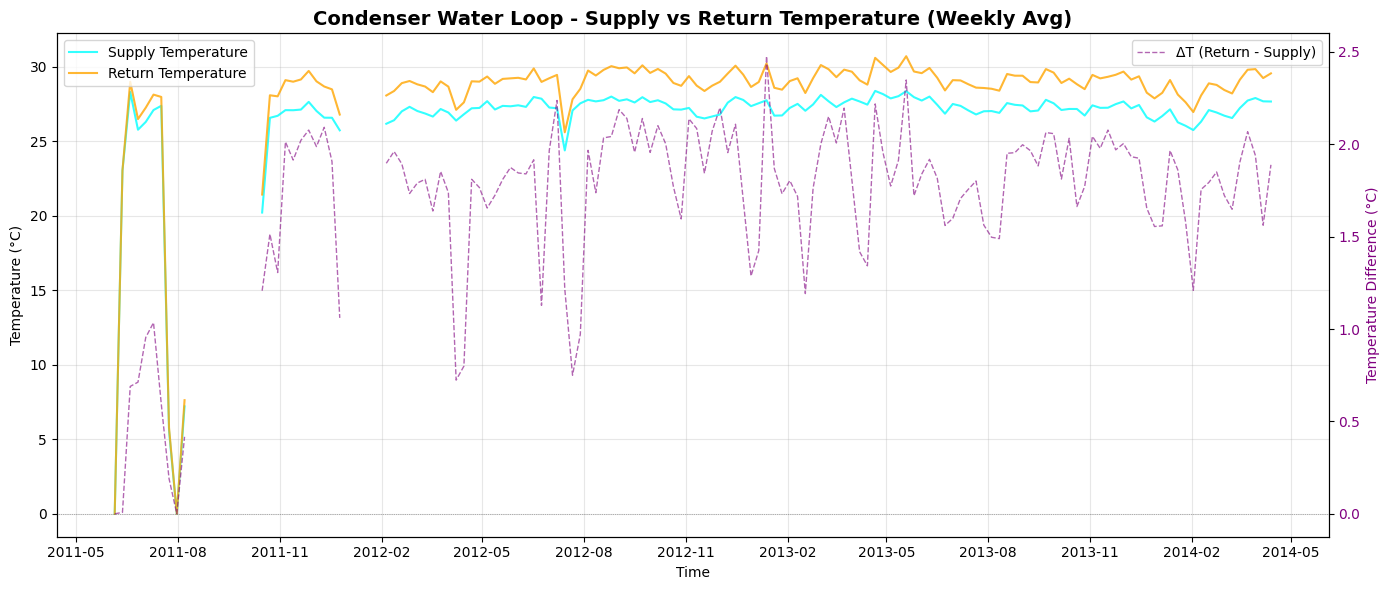


Summary Statistics:
  Supply Temperature: 26.43°C (min: 0.00°C, max: 28.38°C)
  Return Temperature: 28.13°C (min: 0.00°C, max: 30.71°C)
  Average ΔT: 1.70°C (min: 0.00°C, max: 2.48°C)
  Periods with return > supply: 134 (89.3%)
  Periods with return ≤ supply: 2 (1.3%)


In [11]:
# (Previous cells replaced with per-chiller analysis above)
print("=" * 60)
print("2. CONDENSER WATER LOOP - TIME SERIES")
print("=" * 60)
print("Purpose: Confirm heat rejection behavior (return > supply, response to load and weather)")

fig, ax = plt.subplots(figsize=(14, 6))

# Plot supply and return temperatures
ax.plot(df_weekly_resampled['timestamp'], df_weekly_resampled['Avg_CondenserWaterSupplyTemp'], 
        label='Supply Temperature', linewidth=1.5, alpha=0.8, color='cyan')
ax.plot(df_weekly_resampled['timestamp'], df_weekly_resampled['Avg_CondenserWaterReturnTemp'], 
        label='Return Temperature', linewidth=1.5, alpha=0.8, color='orange')

# Calculate and plot delta T
delta_t_cond = df_weekly_resampled['Avg_CondenserWaterReturnTemp'] - df_weekly_resampled['Avg_CondenserWaterSupplyTemp']
ax2 = ax.twinx()
ax2.plot(df_weekly_resampled['timestamp'], delta_t_cond, 
         label='ΔT (Return - Supply)', linewidth=1, alpha=0.6, color='purple', linestyle='--')
ax2.set_ylabel('Temperature Difference (°C)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.axhline(y=0, color='black', linestyle=':', linewidth=0.5, alpha=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)', color='black')
ax.set_title('Condenser Water Loop - Supply vs Return Temperature (Weekly Avg)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nSummary Statistics:")
print(f"  Supply Temperature: {df_weekly_resampled['Avg_CondenserWaterSupplyTemp'].mean():.2f}°C (min: {df_weekly_resampled['Avg_CondenserWaterSupplyTemp'].min():.2f}°C, max: {df_weekly_resampled['Avg_CondenserWaterSupplyTemp'].max():.2f}°C)")
print(f"  Return Temperature: {df_weekly_resampled['Avg_CondenserWaterReturnTemp'].mean():.2f}°C (min: {df_weekly_resampled['Avg_CondenserWaterReturnTemp'].min():.2f}°C, max: {df_weekly_resampled['Avg_CondenserWaterReturnTemp'].max():.2f}°C)")
print(f"  Average ΔT: {delta_t_cond.mean():.2f}°C (min: {delta_t_cond.min():.2f}°C, max: {delta_t_cond.max():.2f}°C)")
print(f"  Periods with return > supply: {(delta_t_cond > 0).sum()} ({(delta_t_cond > 0).sum()/len(delta_t_cond)*100:.1f}%)")
print(f"  Periods with return ≤ supply: {(delta_t_cond <= 0).sum()} ({(delta_t_cond <= 0).sum()/len(delta_t_cond)*100:.1f}%)")

3. COOLING OUTPUT AND ENERGY INPUT - TIME SERIES
Purpose: See how cooling demand relates to power consumption and staging


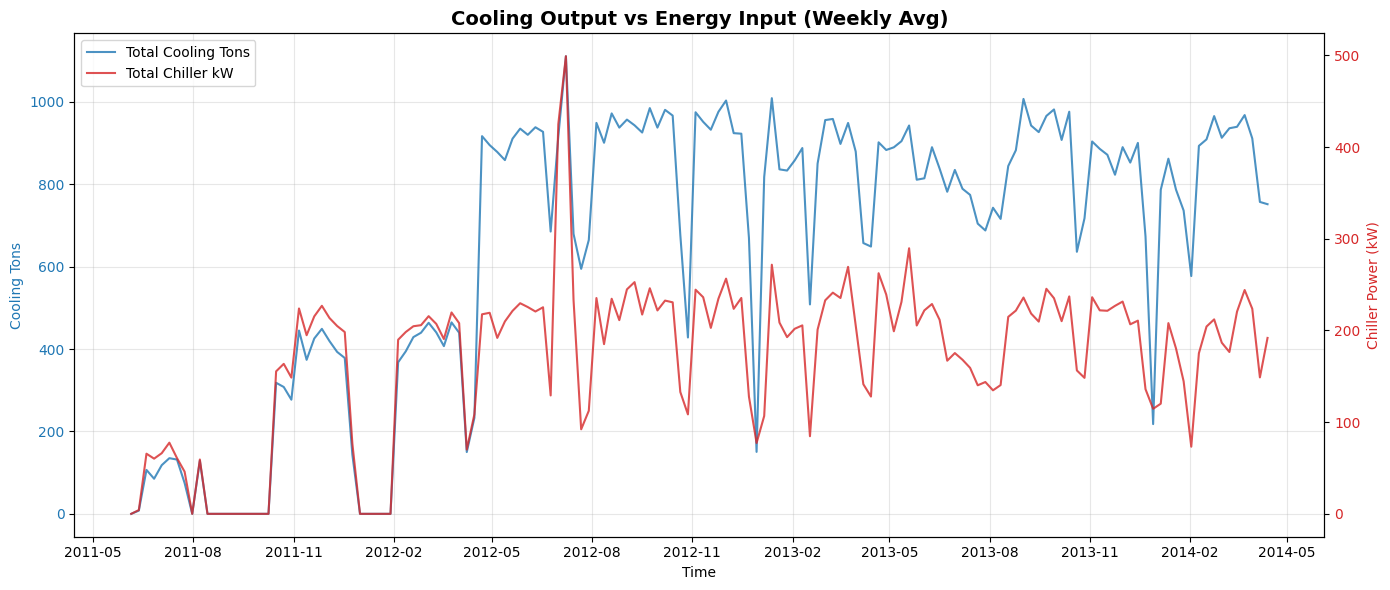


Summary Statistics:
  Total Cooling Tons:
    Mean: 645.25 tons
    Min: 0.00 tons
    Max: 1110.71 tons
    Std Dev: 341.44 tons

  Total Chiller kW:
    Mean: 170.80 kW
    Min: 0.00 kW
    Max: 499.16 kW
    Std Dev: 85.84 kW

  Correlation between Cooling Tons and Chiller kW: 0.835


In [12]:
# (Previous cells replaced with per-chiller analysis above)
print("=" * 60)
print("3. COOLING OUTPUT AND ENERGY INPUT - TIME SERIES")
print("=" * 60)
print("Purpose: See how cooling demand relates to power consumption and staging")

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot cooling tons on left axis
color1 = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Cooling Tons', color=color1)
line1 = ax1.plot(df_weekly_resampled['timestamp'], df_weekly_resampled['Total_CoolingTons'], 
                 label='Total Cooling Tons', color=color1, linewidth=1.5, alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Plot chiller kW on right axis
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Chiller Power (kW)', color=color2)
line2 = ax2.plot(df_weekly_resampled['timestamp'], df_weekly_resampled['Total_Chiller_kW'], 
                 label='Total Chiller kW', color=color2, linewidth=1.5, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

ax1.set_title('Cooling Output vs Energy Input (Weekly Avg)', fontsize=14, fontweight='bold')

# Format x-axis dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nSummary Statistics:")
print(f"  Total Cooling Tons:")
print(f"    Mean: {df_weekly_resampled['Total_CoolingTons'].mean():.2f} tons")
print(f"    Min: {df_weekly_resampled['Total_CoolingTons'].min():.2f} tons")
print(f"    Max: {df_weekly_resampled['Total_CoolingTons'].max():.2f} tons")
print(f"    Std Dev: {df_weekly_resampled['Total_CoolingTons'].std():.2f} tons")
print(f"\n  Total Chiller kW:")
print(f"    Mean: {df_weekly_resampled['Total_Chiller_kW'].mean():.2f} kW")
print(f"    Min: {df_weekly_resampled['Total_Chiller_kW'].min():.2f} kW")
print(f"    Max: {df_weekly_resampled['Total_Chiller_kW'].max():.2f} kW")
print(f"    Std Dev: {df_weekly_resampled['Total_Chiller_kW'].std():.2f} kW")

# Correlation
correlation = df_weekly_resampled[['Total_CoolingTons', 'Total_Chiller_kW']].corr().iloc[0, 1]
print(f"\n  Correlation between Cooling Tons and Chiller kW: {correlation:.3f}")

4. SYSTEM EFFICIENCY - TIME SERIES
Purpose: Establish a baseline and identify obvious inefficient periods


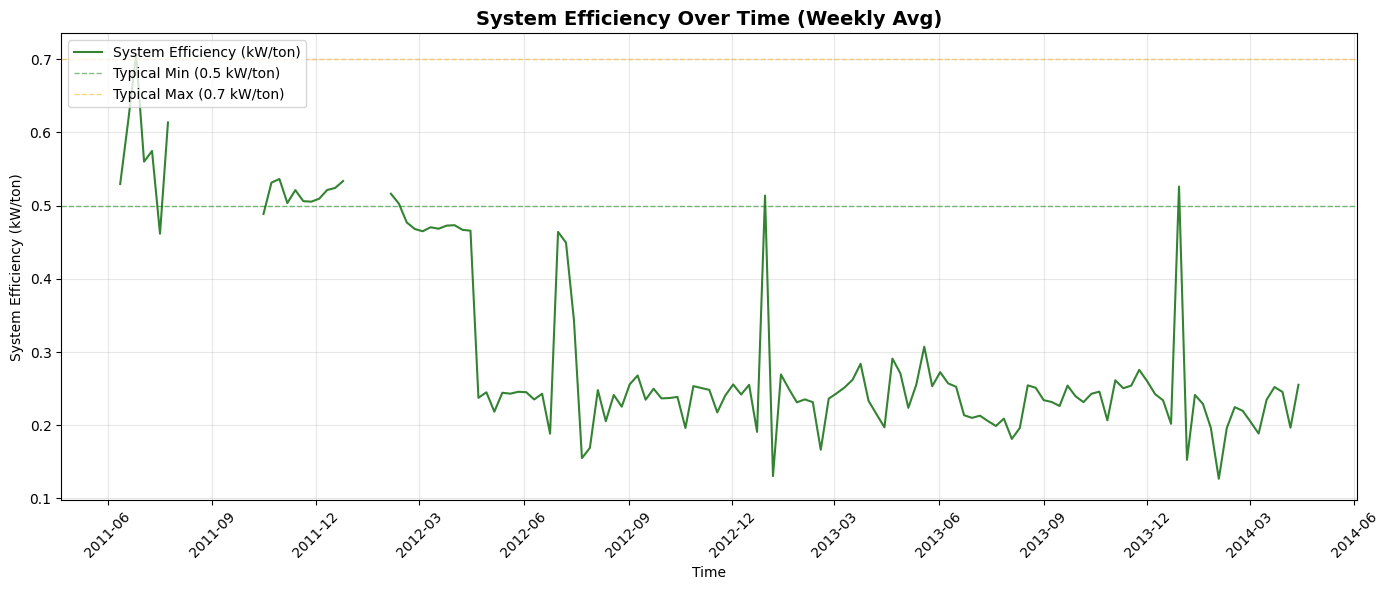


Summary Statistics:
  Mean Efficiency: 0.303 kW/ton
  Median Efficiency: 0.247 kW/ton
  Min Efficiency: 0.127 kW/ton
  Max Efficiency: 0.706 kW/ton
  Std Dev: 0.128 kW/ton

  Efficiency Distribution:
    < 0.5 kW/ton (very efficient): 114 (85.1%)
    0.5-0.7 kW/ton (typical): 19 (14.2%)
    0.7-1.0 kW/ton (moderate): 1 (0.7%)
    > 1.0 kW/ton (inefficient): 0 (0.0%)


In [ ]:
# (Previous cells replaced with per-chiller analysis above)
print("=" * 60)
print("4. SYSTEM EFFICIENCY - TIME SERIES")
print("=" * 60)
print("Purpose: Establish a baseline and identify obvious inefficient periods")

fig, ax = plt.subplots(figsize=(14, 6))

# Plot system efficiency (kW/ton)
ax.plot(df_weekly_resampled['timestamp'], df_weekly_resampled['System_Efficiency_kW_per_Ton'], 
        label='System Efficiency (kW/ton)', linewidth=1.5, alpha=0.8, color='darkgreen')

# Add horizontal lines for reference (typical ranges)
# Typical chiller efficiency: 0.5-0.7 kW/ton for efficient systems
typical_min = 0.5
typical_max = 0.7
ax.axhline(y=typical_min, color='green', linestyle='--', linewidth=1, alpha=0.5, label=f'Typical Min ({typical_min} kW/ton)')
ax.axhline(y=typical_max, color='orange', linestyle='--', linewidth=1, alpha=0.5, label=f'Typical Max ({typical_max} kW/ton)')

# Highlight inefficient periods (> 1.0 kW/ton)
inefficient_mask = df_weekly_resampled['System_Efficiency_kW_per_Ton'] > 1.0
if inefficient_mask.sum() > 0:
    ax.scatter(df_weekly_resampled.loc[inefficient_mask, 'timestamp'], 
               df_weekly_resampled.loc[inefficient_mask, 'System_Efficiency_kW_per_Ton'],
               color='red', s=10, alpha=0.3, label='Inefficient (>1.0 kW/ton)')

ax.set_xlabel('Time')
ax.set_ylabel('System Efficiency (kW/ton)', color='black')
ax.set_title('System Efficiency Over Time (Weekly Avg)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics
efficiency_data = df_weekly_resampled['System_Efficiency_kW_per_Ton'].dropna()
print(f"\nSummary Statistics:")
print(f"  Mean Efficiency: {efficiency_data.mean():.3f} kW/ton")
print(f"  Median Efficiency: {efficiency_data.median():.3f} kW/ton")
print(f"  Min Efficiency: {efficiency_data.min():.3f} kW/ton")
print(f"  Max Efficiency: {efficiency_data.max():.3f} kW/ton")
print(f"  Std Dev: {efficiency_data.std():.3f} kW/ton")
print(f"\n  Efficiency Distribution:")
print(f"    < 0.5 kW/ton (very efficient): {(efficiency_data < 0.5).sum()} ({(efficiency_data < 0.5).sum()/len(efficiency_data)*100:.1f}%)")
print(f"    0.5-0.7 kW/ton (typical): {((efficiency_data >= 0.5) & (efficiency_data <= 0.7)).sum()} ({((efficiency_data >= 0.5) & (efficiency_data <= 0.7)).sum()/len(efficiency_data)*100:.1f}%)")
print(f"    0.7-1.0 kW/ton (moderate): {((efficiency_data > 0.7) & (efficiency_data <= 1.0)).sum()} ({((efficiency_data > 0.7) & (efficiency_data <= 1.0)).sum()/len(efficiency_data)*100:.1f}%)")
print(f"    > 1.0 kW/ton (inefficient): {(efficiency_data > 1.0).sum()} ({(efficiency_data > 1.0).sum()/len(efficiency_data)*100:.1f}%)")

## Export Hourly Data by Year

Resample the cleaned 3-minute `df_combined` to **hourly** intervals (using mean aggregation), add system-level derived columns, then export one CSV per year:

- `hourly_data_2011.csv`
- `hourly_data_2012.csv`
- `hourly_data_2013.csv`
- `hourly_data_2014.csv`

In [ ]:
import os

print("=" * 70)
print("EXPORTING HOURLY DATA BY YEAR (WITH COMPLETE COVERAGE)")
print("=" * 70)

# ── Resample df_combined (3-min intervals) to hourly ──────────────────────
df_hourly_indexed = df_combined.set_index('timestamp').copy()
numeric_cols_h = df_hourly_indexed.select_dtypes(include=[np.number]).columns.tolist()

# Resample to hourly using mean
df_hourly = df_hourly_indexed[numeric_cols_h].resample('h').mean()

print(f"\nAfter resampling: {len(df_hourly)} hourly rows")
print(f"Date range: {df_hourly.index.min()} → {df_hourly.index.max()}")

# ── Ensure complete hourly coverage and fill missing values ────────────────
# Create complete hourly range for the entire period
start_time = df_hourly.index.min()
end_time = df_hourly.index.max()
complete_hourly_range = pd.date_range(start=start_time, end=end_time, freq='h')

# Reindex to complete range (missing hours will have NaN)
df_hourly = df_hourly.reindex(complete_hourly_range)

# Fill NaN values with 0 (consistent with notebook approach: NaN = equipment off)
missing_before = df_hourly.isnull().sum().sum()
df_hourly = df_hourly.fillna(0)

print(f"Filled {missing_before:,} missing values with 0 (equipment was OFF)")
print(f"Complete hourly coverage: {len(df_hourly)} rows")

# Reset index to make timestamp a column
df_hourly = df_hourly.reset_index()
df_hourly = df_hourly.rename(columns={'index': 'timestamp'})

# ── Add system-level derived columns ──────────────────────────────────────
# Total Cooling Tons (sum across 3 chillers)
cooling_tons_cols = [c for c in df_hourly.columns if 'CoolingTons' in c]
df_hourly['Total_CoolingTons'] = df_hourly[cooling_tons_cols].sum(axis=1)

# Total Chiller kW (sum across 3 chillers, exclude pump column)
chiller_kw_cols = [c for c in df_hourly.columns if 'kW' in c and 'Chiller' in c and 'Total' not in c]
df_hourly['Total_Chiller_kW'] = df_hourly[chiller_kw_cols].sum(axis=1)

# Average temperatures across chillers
chilled_supply_cols = [c for c in df_hourly.columns if 'ChilledWaterSupplyTemp' in c]
chilled_return_cols = [c for c in df_hourly.columns if 'ChilledWaterReturnTemp' in c]
condenser_supply_cols = [c for c in df_hourly.columns if 'CondenserWaterSupplyTemp' in c and 'Chiller' in c]
condenser_return_cols = [c for c in df_hourly.columns if 'CondenserWaterReturnTemp' in c]

df_hourly['Avg_ChilledWaterSupplyTemp'] = df_hourly[chilled_supply_cols].mean(axis=1)
df_hourly['Avg_ChilledWaterReturnTemp'] = df_hourly[chilled_return_cols].mean(axis=1)
df_hourly['Avg_CondenserWaterSupplyTemp'] = df_hourly[condenser_supply_cols].mean(axis=1)
df_hourly['Avg_CondenserWaterReturnTemp'] = df_hourly[condenser_return_cols].mean(axis=1)

# System efficiency (kW/ton) - avoid division by zero
df_hourly['System_Efficiency_kW_per_Ton'] = np.where(
    df_hourly['Total_CoolingTons'] > 0,
    df_hourly['Total_Chiller_kW'] / df_hourly['Total_CoolingTons'],
    np.nan
)

# Fill efficiency NaN with 0 (when system is off)
df_hourly['System_Efficiency_kW_per_Ton'] = df_hourly['System_Efficiency_kW_per_Ton'].fillna(0)

# ── Verify no missing values ──────────────────────────────────────────────
numeric_cols_final = df_hourly.select_dtypes(include=[np.number]).columns.tolist()
missing_final = df_hourly[numeric_cols_final].isnull().sum().sum()
print(f"\n✓ Missing values remaining: {missing_final}")

# ── Split by year and export ──────────────────────────────────────────────
df_hourly['year'] = df_hourly['timestamp'].dt.year
years = sorted(df_hourly['year'].unique())

output_dir = os.path.dirname(os.path.abspath('FullRawChillerPlant_demo_usage.csv'))
print(f"\nOutput directory: {output_dir}")
print(f"Years found: {years}\n")

for year in years:
    df_year = df_hourly[df_hourly['year'] == year].drop(columns=['year']).copy()
    
    # Verify complete hourly coverage for this year
    year_start = pd.Timestamp(f"{year}-01-01 00:00:00")
    year_end = pd.Timestamp(f"{year}-12-31 23:00:00")
    if year == df_hourly['year'].max():  # Last year might be partial
        year_end = df_year['timestamp'].max()
    
    expected_hours = pd.date_range(year_start, year_end, freq='h')
    actual_hours = set(df_year['timestamp'])
    missing_hours = set(expected_hours) - actual_hours
    
    filename = f"hourly_data_{year}.csv"
    filepath = os.path.join(output_dir, filename)
    df_year.to_csv(filepath, index=False)
    
    print(f"  ✓ {filename}")
    print(f"    Rows: {len(df_year):,}  |  {df_year['timestamp'].min()} → {df_year['timestamp'].max()}")
    if len(missing_hours) > 0:
        print(f"    ⚠ Missing hours: {len(missing_hours)}")
    else:
        print(f"    ✓ Complete hourly coverage")
    
    # Verify no NaN values
    nan_count = df_year.select_dtypes(include=[np.number]).isnull().sum().sum()
    if nan_count > 0:
        print(f"    ⚠ NaN values: {nan_count}")
    else:
        print(f"    ✓ No missing data points")

print(f"\n{'=' * 70}")
print(f"Done! Exported {len(years)} files with complete hourly coverage.")
print(f"{'=' * 70}")